# Best Results based on this file 


- Best Model: XG Boost Oversample SVMSMOTE
- Best parameters: {'model__max_depth': 5, 'model__n_estimators': 60, 'model__subsample': 0.9, 'svmsmote__k_neighbors': 2}
- Mean Cross validation score of Best model: 0.88418
- Test score of best model: 0.8108108108108107
- Train score of best model: 1.0

#### Note: Stacking Classifier performed better and can be found in the next file submitted. In this above selected model, there might be overfitting isssues which are resolved by stacking classifier 6 which gives a better CV score and no overfitting indication. (train score is closer to CV score and test score)


## Data Pre-processing Steps Explanation

- Identification Steps - identify categorical variables, numerical variables and missing value variables
- Check for outliers as well as distributions of the variables
- Because the information on the variables was not disclosed, there was no knowledge based preprocessing done
- For missing value imputations, the distribution of the both the variables was checked and then median imputation was used
- Other variables were transformed and standardized using YeoJohnson Transformer and RobertScaler
- Other transformations have restrictions over negative values, therefore YeoJohnson was selected
- Due to transformations, the variables distributions were normalized

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
#test dataset

df_test=pd.read_csv('test.csv')
test = df_test.copy()

In [3]:
df=pd.read_csv('train.csv')

data=df.copy()

In [4]:
data.shape

(24846, 31)

In [5]:
data.head()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,138662,-0.711273,1.272483,1.681631,0.039897,-0.312381,-1.161083,0.853875,-0.173979,-0.438558,-0.053805,0.321036,0.814690,1.226450,-0.152389,0.687480,-0.030825,-0.284477,-0.696867,-0.227419,0.298008,-0.208181,-0.414631,0.057957,0.930321,-0.165598,0.038799,0.384295,0.192762,21.87,0
1,235999,1.990679,-0.128465,-1.700556,0.529839,0.136889,-1.404270,0.593353,-0.456700,0.648260,-0.071353,-0.982339,0.229658,-0.592959,0.574159,-0.263545,-0.780886,-0.066039,-0.575168,0.227544,-0.205092,0.018179,0.179084,-0.004248,0.039531,0.333765,-0.225201,-0.047285,-0.059682,49.99,0
2,245376,1.812653,-0.476162,-0.338988,1.386750,-0.745965,-0.449870,-0.492226,0.029904,1.129394,0.227346,-1.197477,-0.555129,-1.369130,0.320282,1.002745,0.501765,-0.670053,0.478236,-0.820942,-0.202894,0.252668,0.655719,0.090057,-0.136884,-0.172452,-0.556921,0.036490,-0.021575,79.00,0
3,202483,-1.014219,0.522775,-0.337978,-1.957797,3.578395,3.266965,0.602857,0.644645,-0.305879,-0.417906,0.010333,-0.299630,-0.379164,0.329193,0.957904,-0.417285,-0.705683,-0.063235,-0.381035,0.136061,0.147742,0.590740,-0.680551,0.745346,1.119496,0.013520,0.004530,-0.132643,6.00,0
4,9710,-0.967270,-0.053815,2.273463,-0.894434,0.728924,0.153524,-0.038330,0.165252,1.172526,-0.879114,2.505831,-2.249565,0.791677,1.546279,-0.133370,0.184501,0.307080,-0.081722,-1.359941,0.007512,0.106692,0.514430,-0.081546,-0.305042,-0.354883,0.896254,-0.182293,-0.142810,15.95,0


In [6]:
data.columns

Index(['Id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'Target'],
      dtype='object')

In [7]:
#target variable
data['Target'].value_counts()

0    24602
1      244
Name: Target, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24846 entries, 0 to 24845
Data columns (total 31 columns):
Id        24846 non-null int64
V1        22459 non-null float64
V2        24846 non-null float64
V3        24846 non-null float64
V4        24846 non-null float64
V5        24846 non-null float64
V6        24846 non-null float64
V7        24846 non-null float64
V8        24846 non-null float64
V9        24846 non-null float64
V10       24846 non-null float64
V11       24846 non-null float64
V12       24846 non-null float64
V13       24846 non-null float64
V14       24846 non-null float64
V15       24846 non-null float64
V16       24846 non-null float64
V17       24846 non-null float64
V18       24846 non-null float64
V19       24846 non-null float64
V20       22317 non-null float64
V21       24846 non-null float64
V22       24846 non-null float64
V23       24846 non-null float64
V24       24846 non-null float64
V25       24846 non-null float64
V26       24846 non-null float64
V2

In [9]:
categorical = [var for var in data.columns if data[var].dtypes=='O']
print(categorical)
print(len(categorical))

[]
0


In [10]:
numerical = [var for var in data.columns if data[var].dtypes!='O']
print(numerical)
print(len(numerical))

['Id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'Target']
31


In [11]:
discrete = [var for var in numerical if len(data[var].unique()) < 20]
print(discrete)
print(f'There are {len(discrete)} discrete variables')

['Target']
There are 1 discrete variables


In [12]:
continuous = [var for var in numerical if var not in discrete]
print(continuous)
print(len(continuous))

['Id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
30


In [13]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

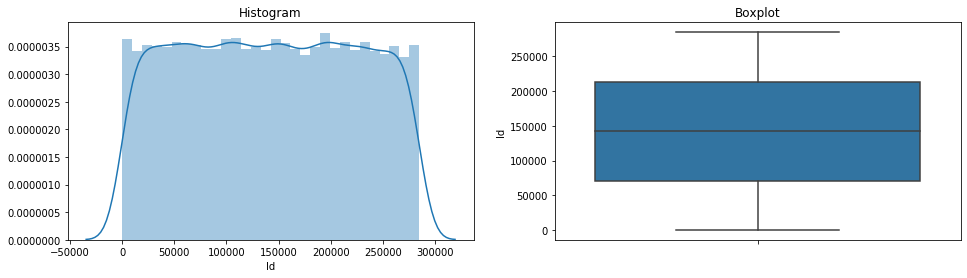

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


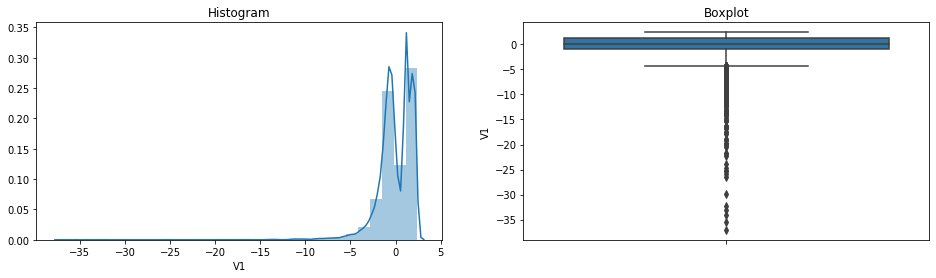

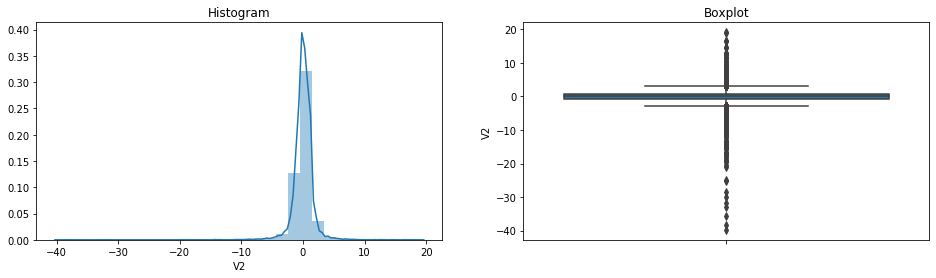

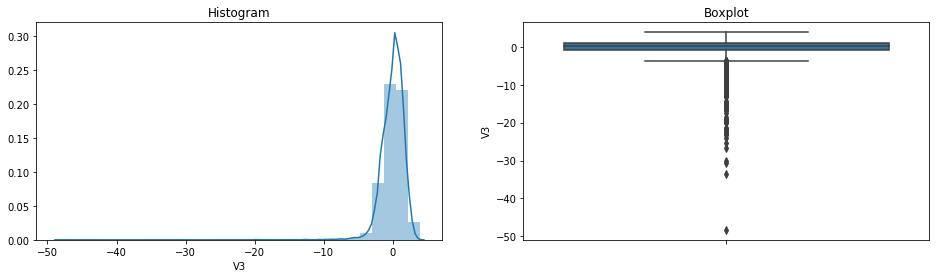

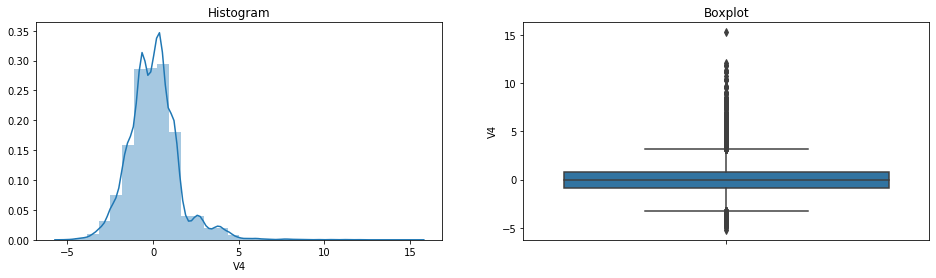

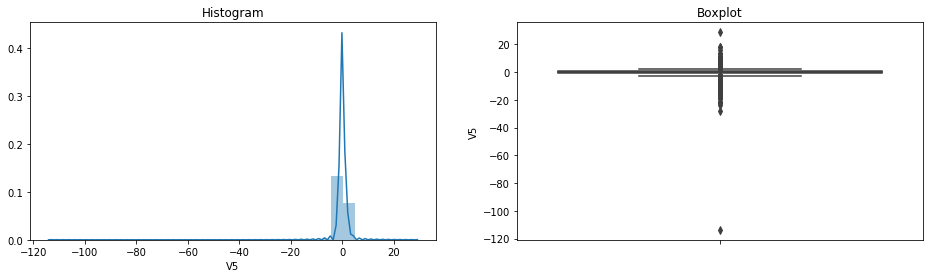

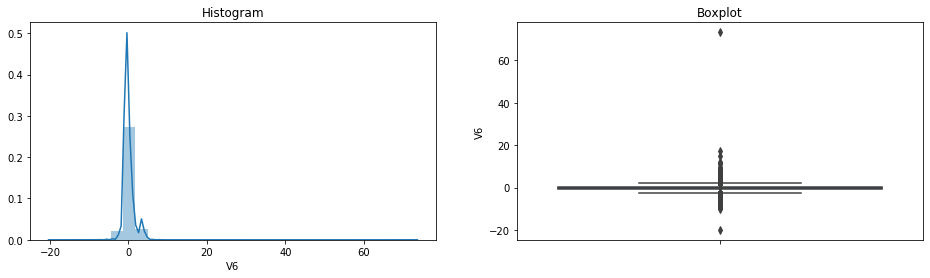

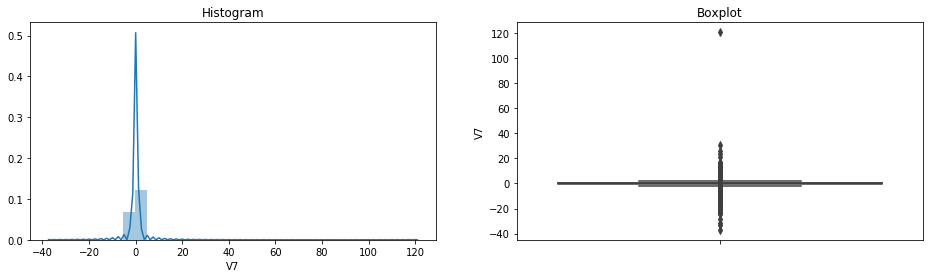

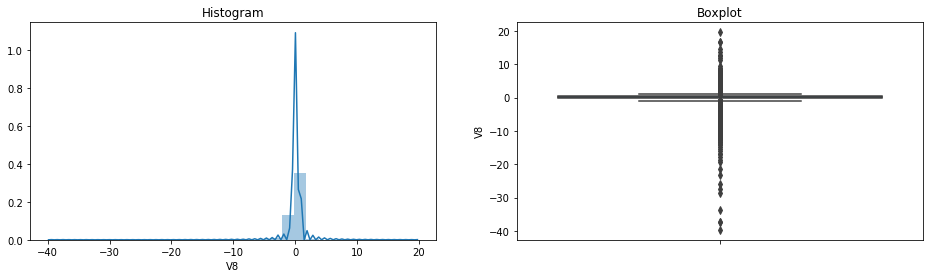

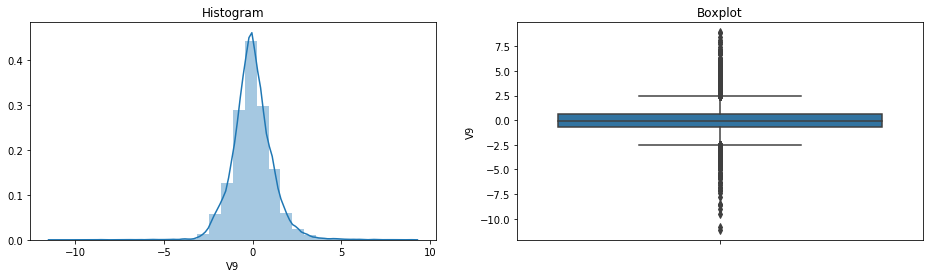

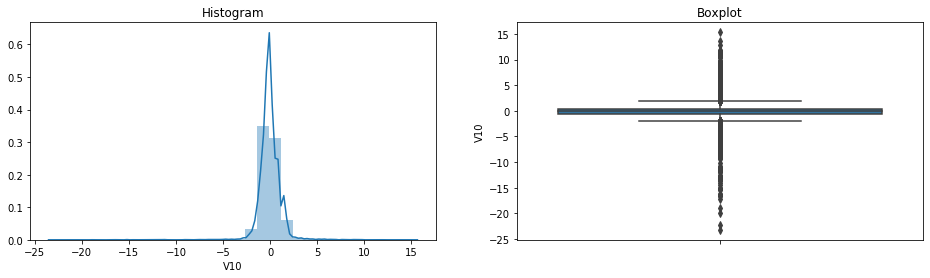

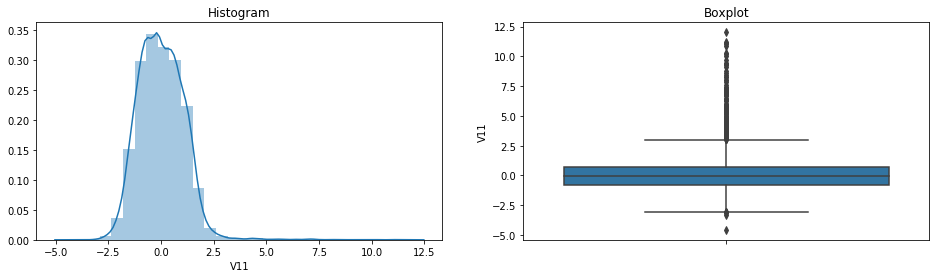

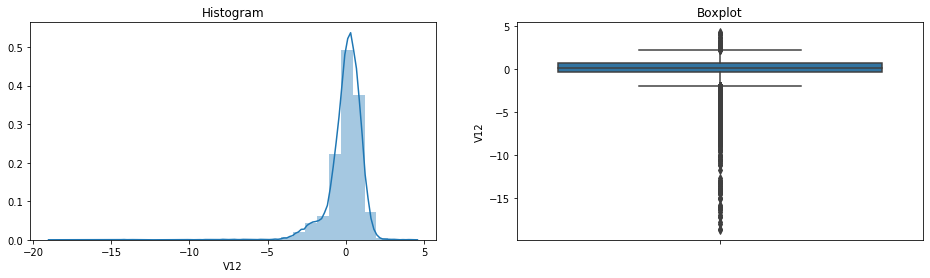

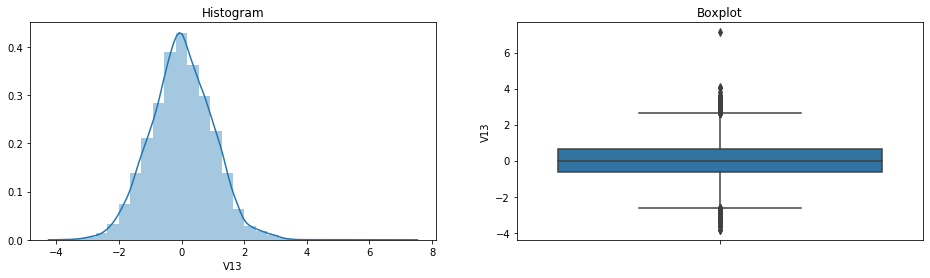

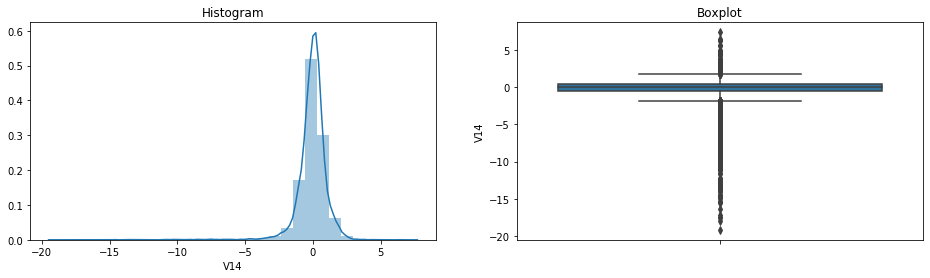

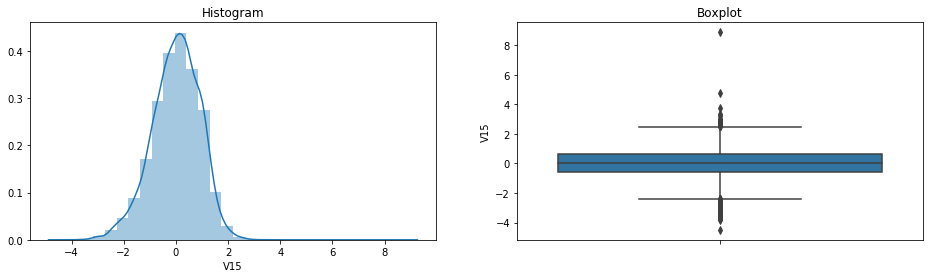

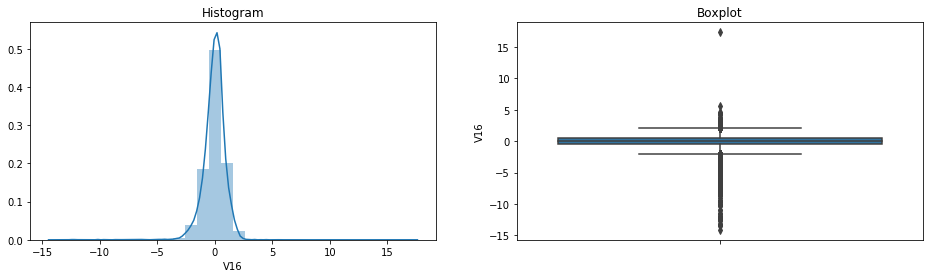

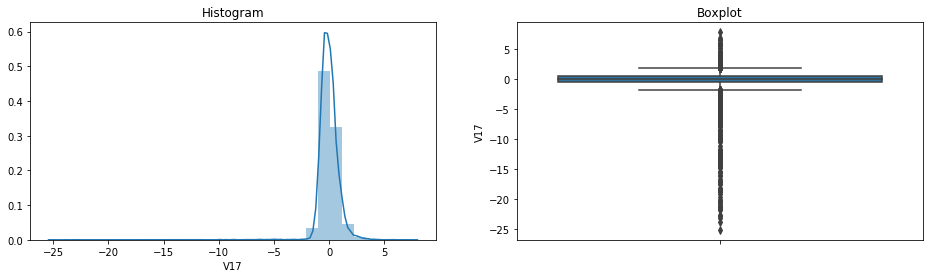

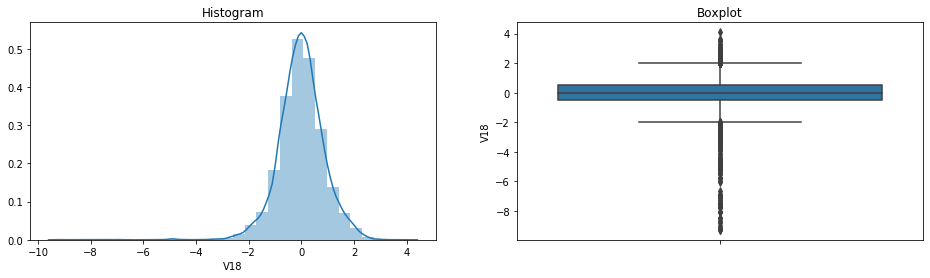

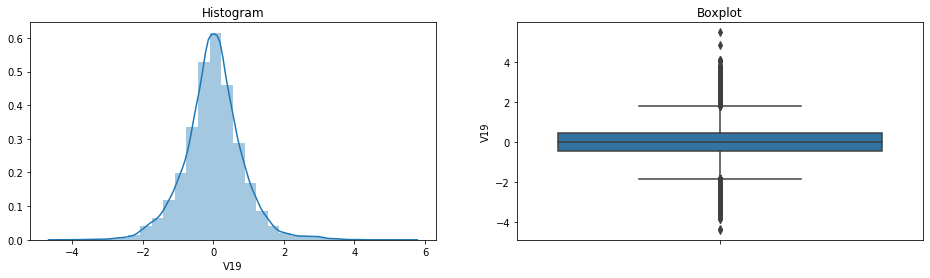

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


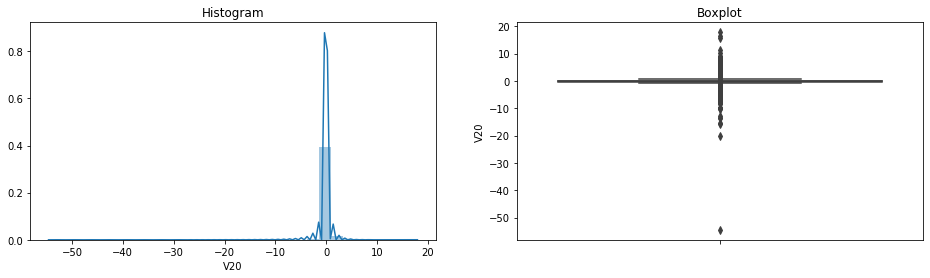

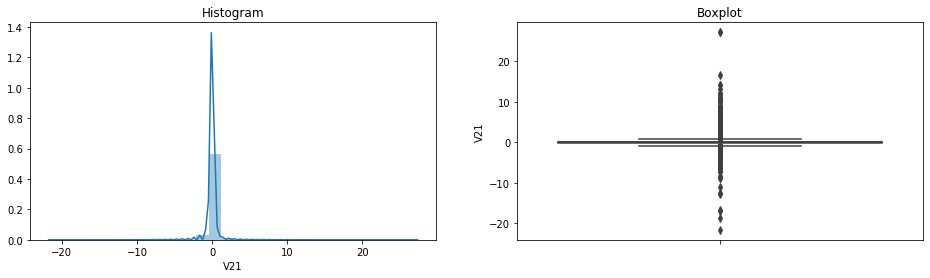

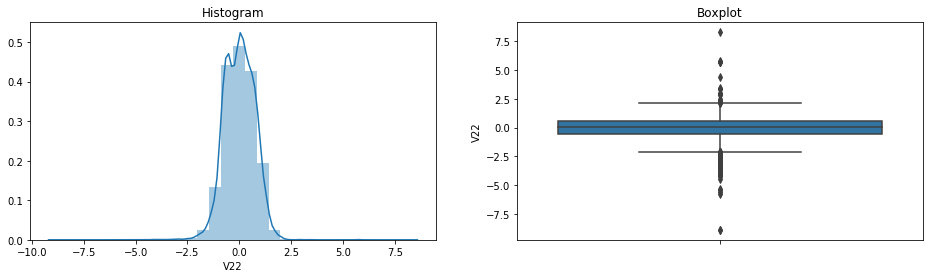

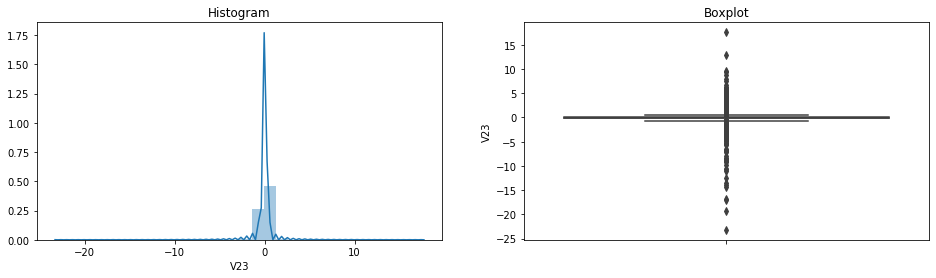

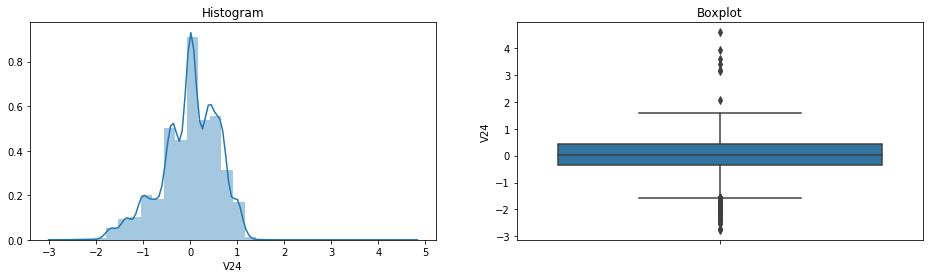

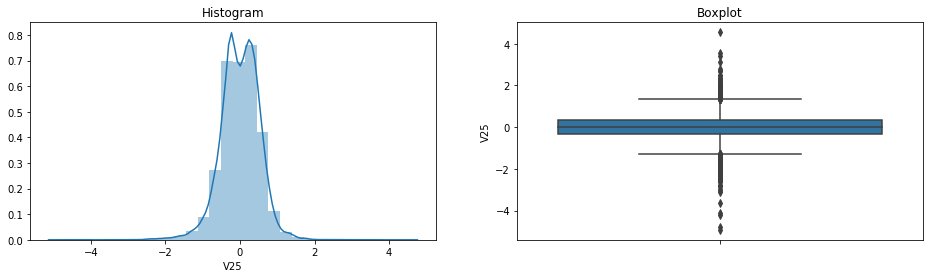

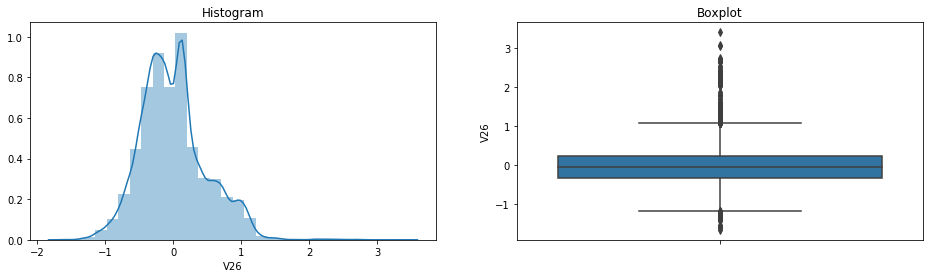

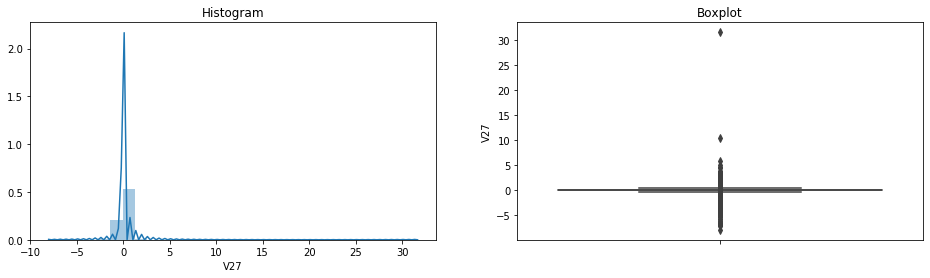

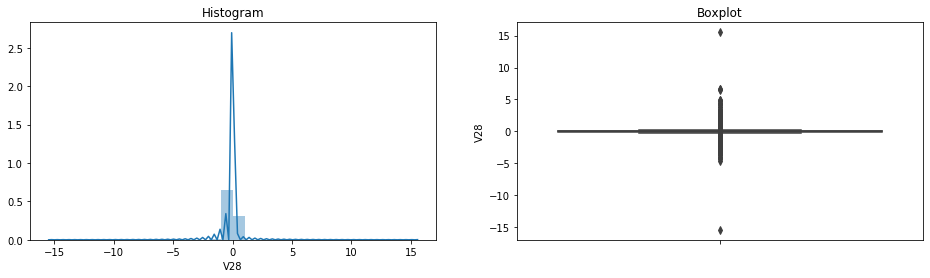

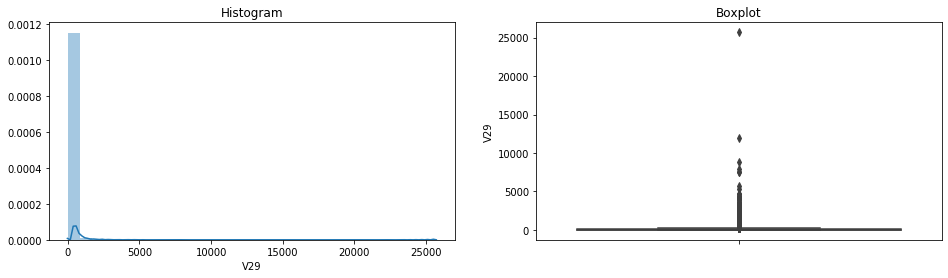

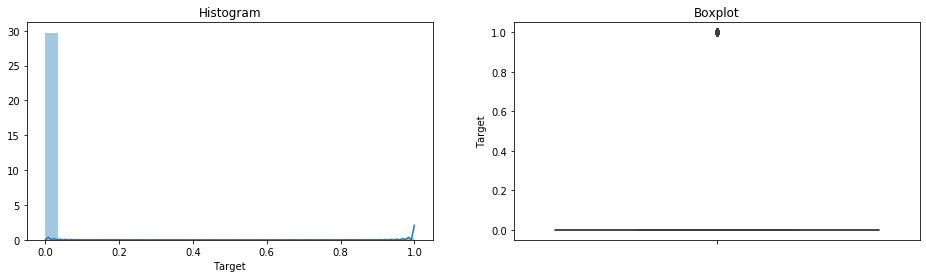

In [14]:
for var in data:
    diagnostic_plots(data, var)

In [15]:
missing_data_columns= list(data.columns[data.isnull().mean()>0.0])
print(missing_data_columns)
len(missing_data_columns)

['V1', 'V20']


2

In [16]:
#divide dataset into train, test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Target','Id'], axis=1),
                                                    data['Target'],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((19876, 29), (4970, 29))

In [17]:
df_test=df_test.drop(['Id'], axis=1)
df_test.shape

(24846, 29)

In [18]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import YeoJohnsonTransformer
from feature_engine import variable_transformers as vt
from sklearn.impute import SimpleImputer

In [19]:
data_pre_process = Pipeline([
    
    # missing data imputation 
   ('mean_median_imputation', mdi.MeanMedianImputer(imputation_method='median',
                                   variables=missing_data_columns)),
   
    # Transforming Numerical Variables
   ('yjt', YeoJohnsonTransformer()),

    # feature Scaling
     ('scaler', RobustScaler())
    
])

In [20]:
data_pre_process.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('mean_median_imputation',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['V1', 'V20'])),
                ('yjt',
                 YeoJohnsonTransformer(variables=['V1', 'V2', 'V3', 'V4', 'V5',
                                                  'V6', 'V7', 'V8', 'V9', 'V10',
                                                  'V11', 'V12', 'V13', 'V14',
                                                  'V15', 'V16', 'V17', 'V18',
                                                  'V19', 'V20', 'V21', 'V22',
                                                  'V23', 'V24', 'V25', 'V26',
                                                  'V27', 'V28', 'V29'])),
                ('scaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True))],
         verbose=False)

In [21]:
df_test=data_pre_process.transform(df_test)

In [22]:
X_train=pd.DataFrame(data_pre_process.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(data_pre_process.transform(X_test),columns=X_test.columns)

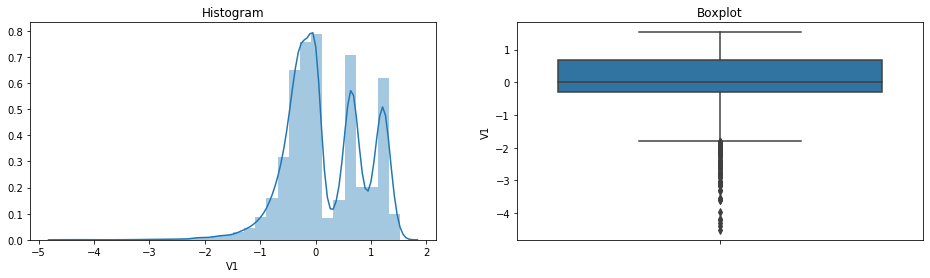

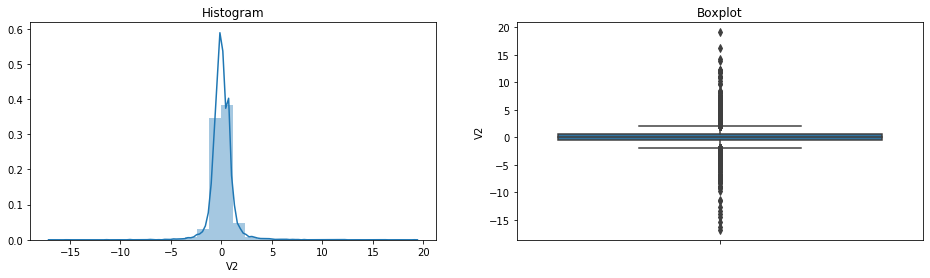

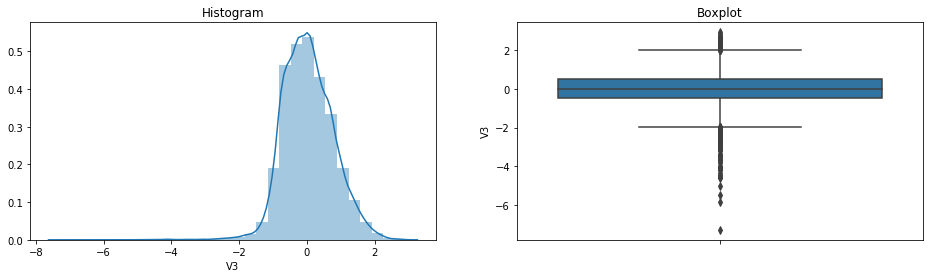

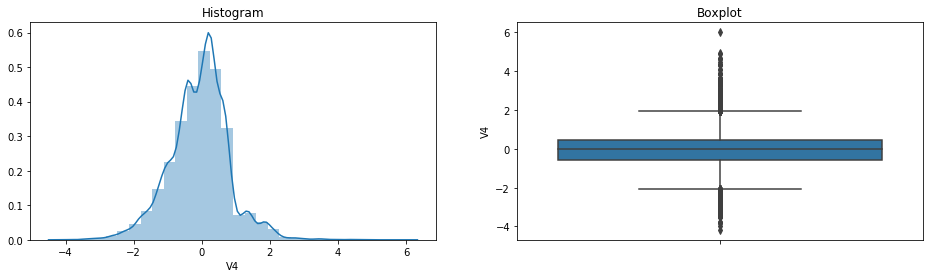

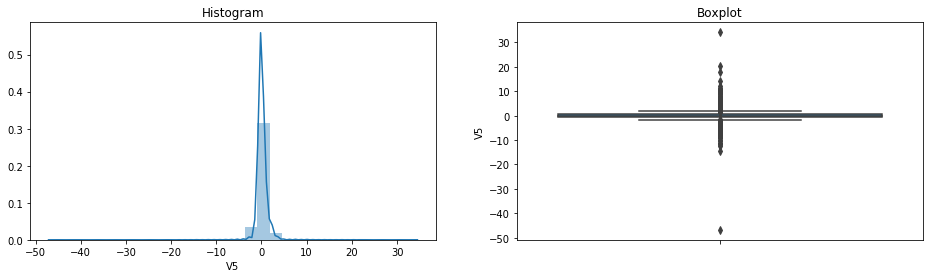

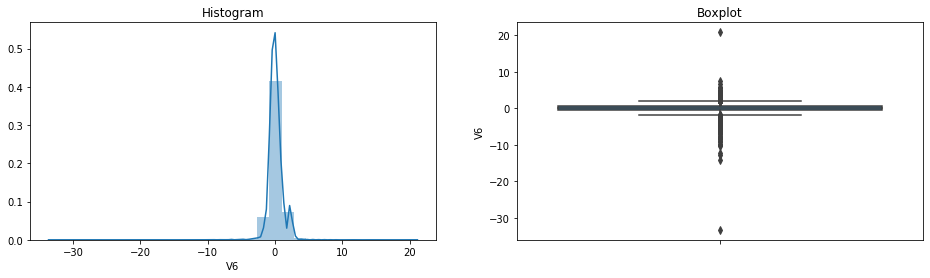

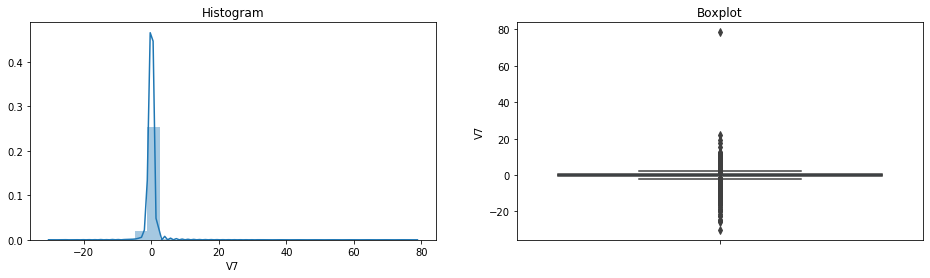

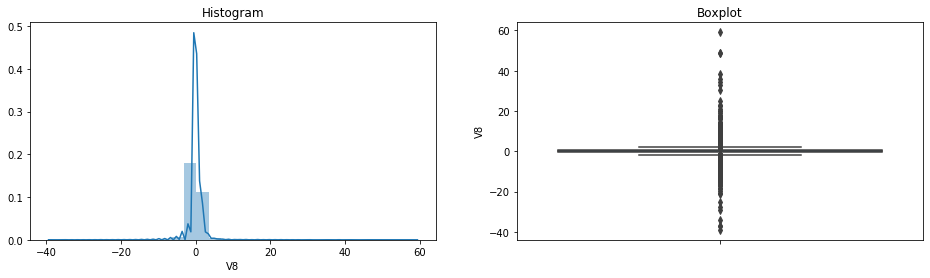

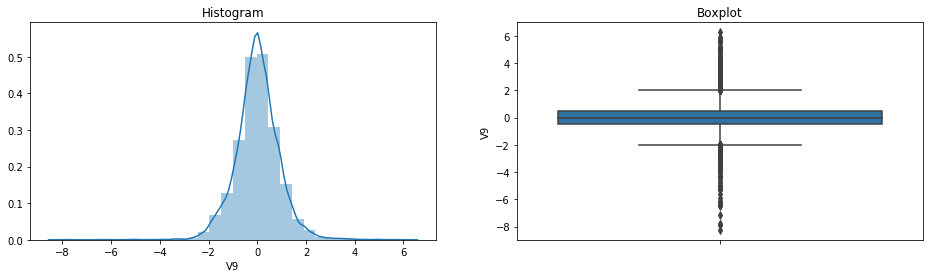

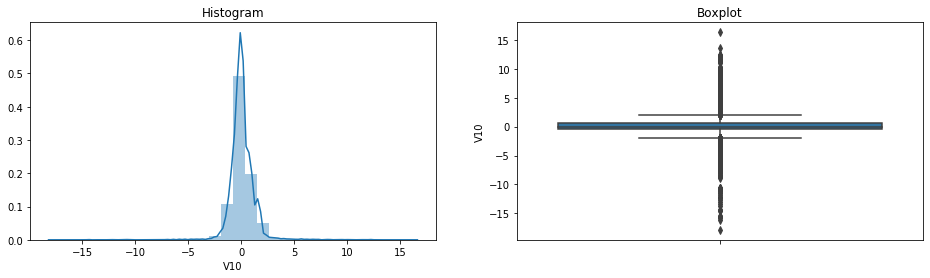

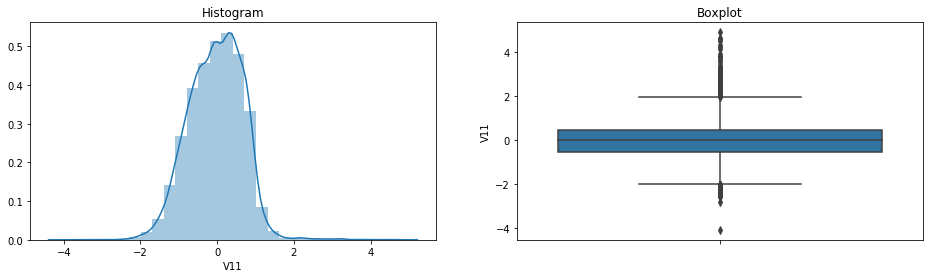

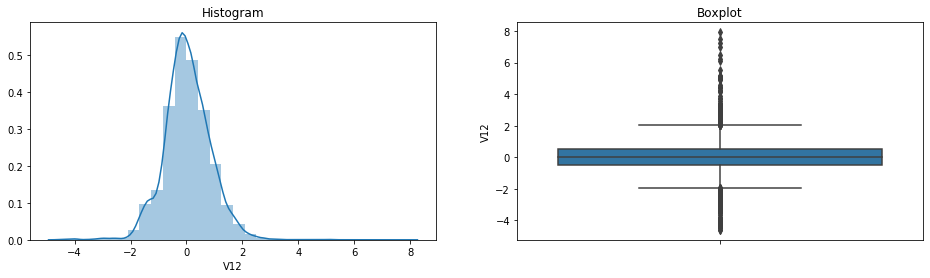

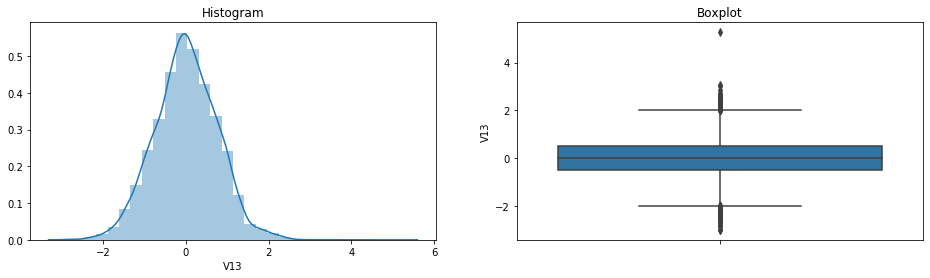

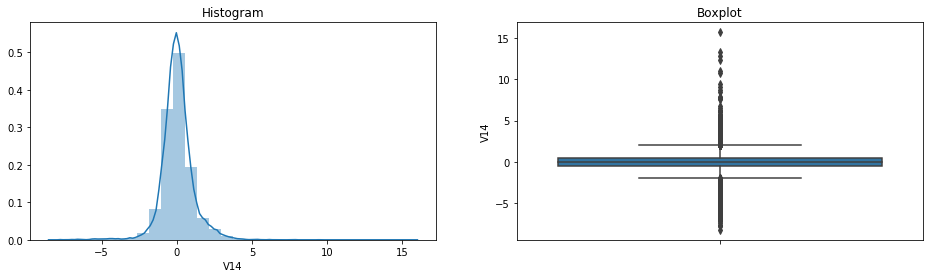

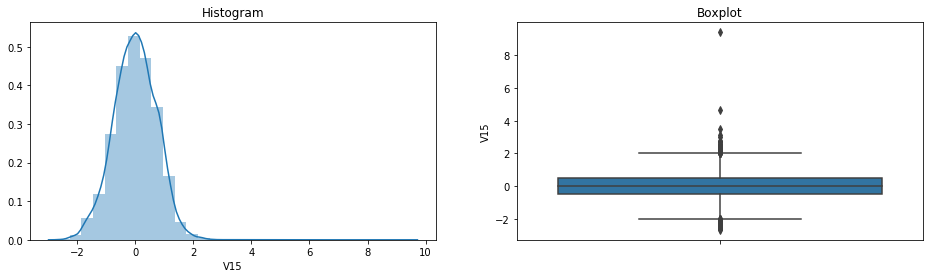

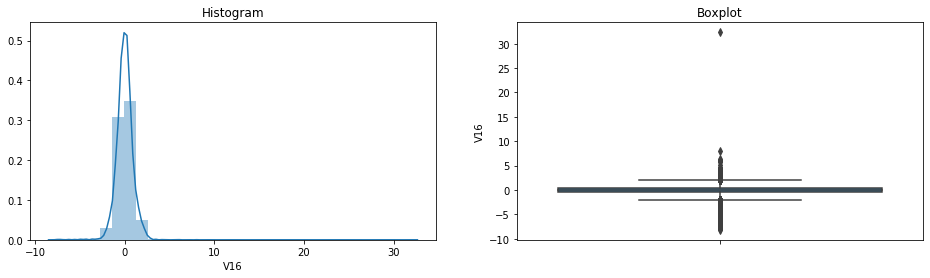

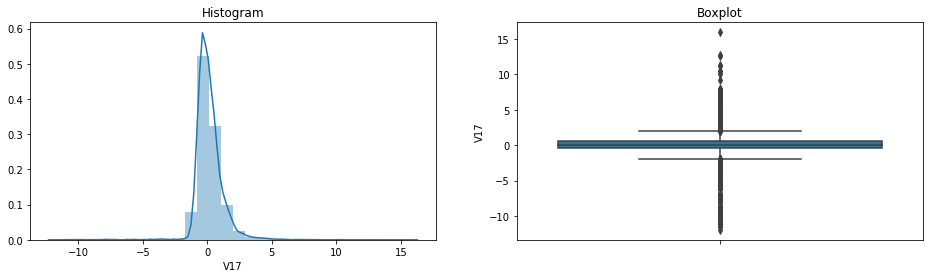

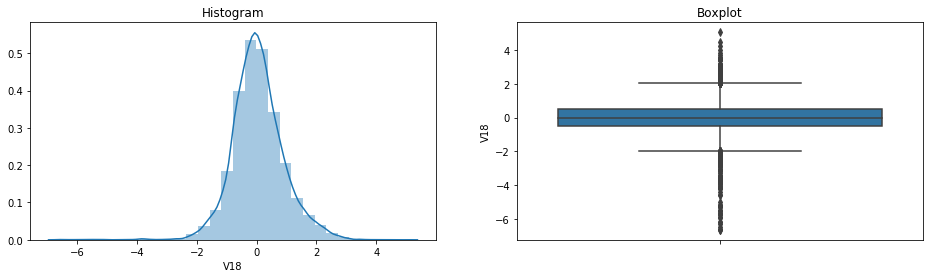

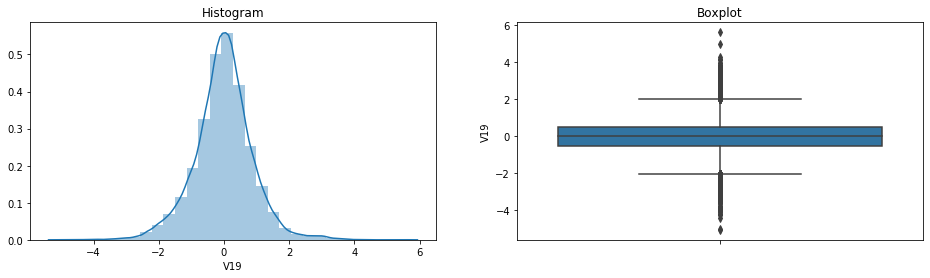

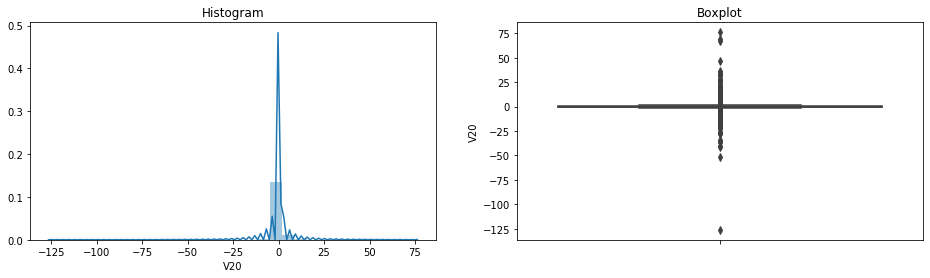

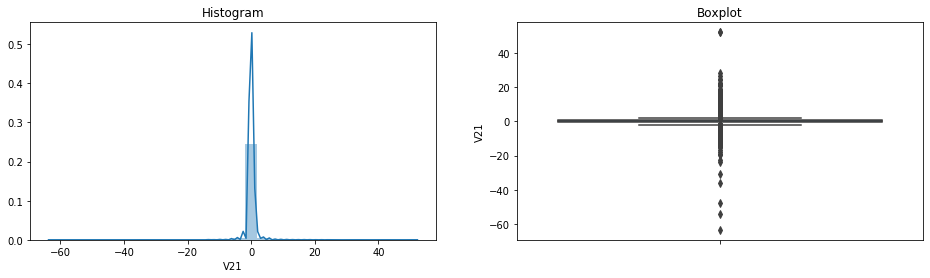

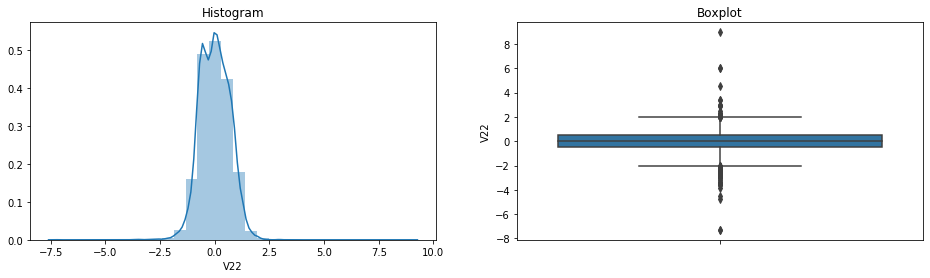

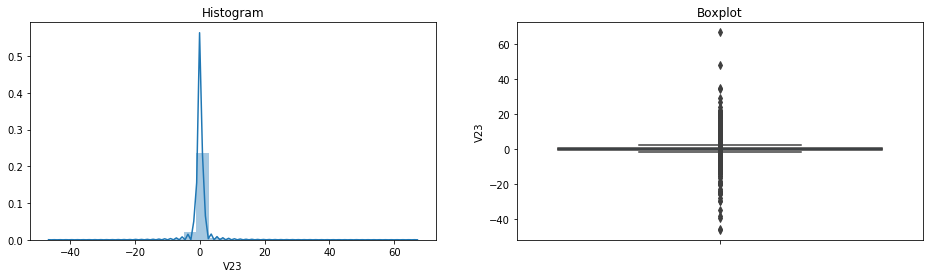

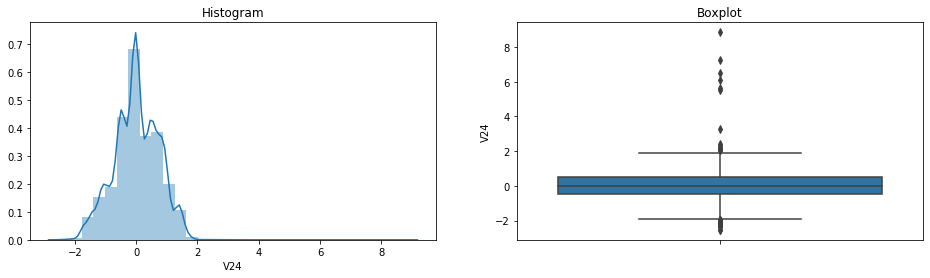

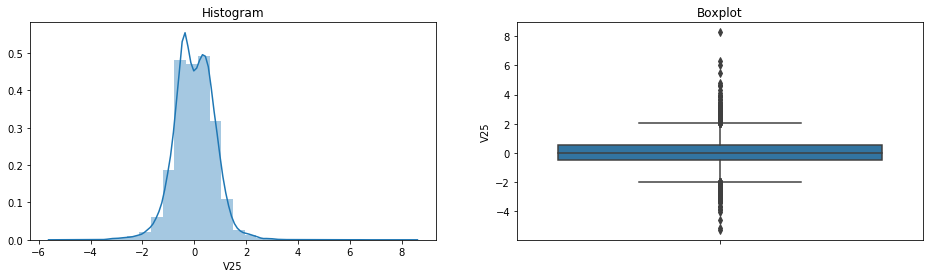

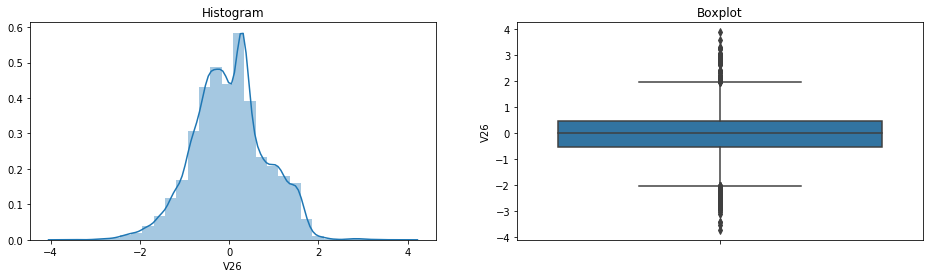

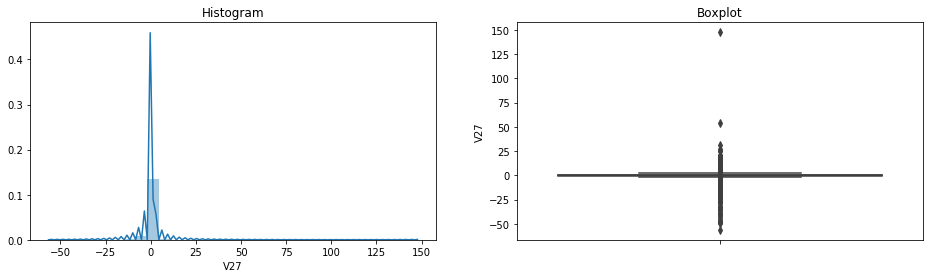

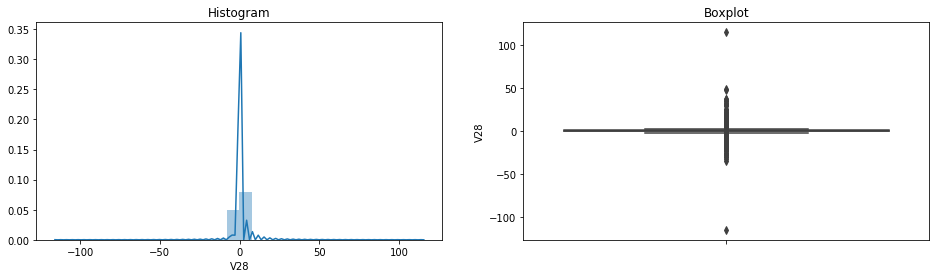

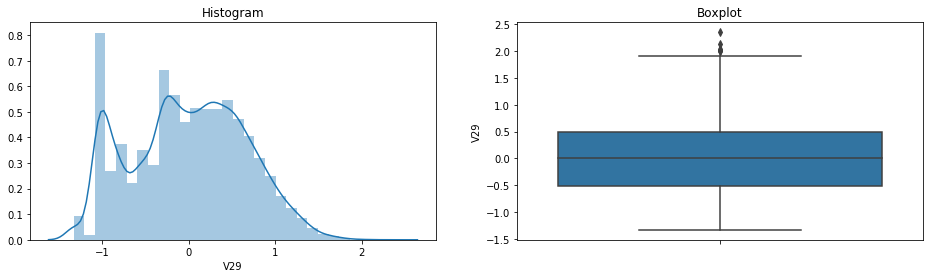

In [23]:
for var in X_train:
    diagnostic_plots(X_train, var)

# Project Requirements

### Naive Classifier

##### Creating F2 Scorer as specified in the requirments

In [24]:
#Making f2 scorer for Grid search CV
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
ftwo_scorer

make_scorer(fbeta_score, beta=2)

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
dummy_clf = DummyClassifier(strategy="constant",constant=1).fit(X_train,y_train)
cv_scores = cross_val_score(dummy_clf, X_train, y_train, scoring=ftwo_scorer, cv=10, n_jobs=-1)
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
# Check test data set performance
print("Performance on train set: ", dummy_clf.score(X_train,y_train))
print("Performance on test set: ", dummy_clf.score(X_test,y_test))

Mean Cross-validation scores: 0.04626893285719761
Performance on train set:  0.009609579392231837
Performance on test set:  0.010663983903420523


## Basic Algorithms

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from  sklearn.ensemble import ExtraTreesClassifier
from  sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score

import pickle

### Logistic Regression



In [143]:
import warnings
warnings.filterwarnings("ignore")
logreg=LogisticRegression(max_iter=1000)

logreg_param= {'C': [0.001,0.01,0.1,1,10,100], 'penalty': ['l1','l2','elasticnet']}
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
logreg_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [144]:
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8254967385558272
Best Mean Cross Validation Score is {'C': 1, 'penalty': 'l2'}
Train score is 0.8333333333333333
Test score is 0.7707509881422925


In [145]:
import pickle
filename = 'logreg_model.sav'
pickle.dump(logreg_grid, open(filename, 'wb'))

### Decision Tree

In [29]:
dtree = DecisionTreeClassifier()
dtree_param = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,6),
              "splitter": ["best", "random"]}
dtree_grid = GridSearchCV(dtree, dtree_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         '

In [51]:
print(f'Best Mean Cross Validation Score is {dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {dtree_grid.best_params_}')
print(f'Train score is {dtree_grid.score(X_train,y_train)}')
print(f'Test score is {dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8325510758643014
Best Mean Cross Validation Score is {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'splitter': 'best'}
Train score is 0.8618843683083511
Test score is 0.8203125000000001


In [53]:
import pickle
filename = 'dtree_model.sav'
pickle.dump(dtree_grid, open(filename, 'wb'))

### KNN


In [31]:
knn= KNeighborsClassifier()

knn_param= {'p': [1,2], 'n_neighbors' : range(1,20), 'weights': ['uniform','distance']}
knn_grid = GridSearchCV(knn, knn_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [32]:
print(f'Best Mean Cross Validation Score is {knn_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {knn_grid.best_params_}')
print(f'Train score is {knn_grid.score(X_train,y_train)}')
print(f'Test score is {knn_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8610104925018017
Best Mean Cross Validation Score is {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Train score is 1.0
Test score is 0.7976653696498054


In [54]:
filename = 'knn_model.sav'
pickle.dump(knn_grid, open(filename, 'wb'))

### Linear SVC


In [33]:
lsvc=SVC(kernel='linear',probability=True)
lsvc_param= {'C': [0.001,0.01,0.1,1,10,100],}
lsvc_grid = GridSearchCV(lsvc, lsvc_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
lsvc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [55]:
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_params_}')
print(f'Train score is {lsvc_grid.score(X_train,y_train)}')
print(f'Test score is {lsvc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8362784880472542
Best Mean Cross Validation Score is {'C': 0.001}
Train score is 0.8369330453563716
Test score is 0.7707509881422925


In [56]:
filename = 'lsvc_model.sav'
pickle.dump(lsvc_grid, open(filename, 'wb'))

### Random Forest


In [35]:
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [57]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8541910095532638
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.8836206896551724
Test score is 0.8203125000000001


In [58]:
filename = 'rfc_model.sav'
pickle.dump(rfc_grid, open(filename, 'wb'))

### Extra Trees

In [38]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [59]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7516879816998386
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.7874449339207048
Test score is 0.6147540983606556


In [60]:
filename = 'etc_model.sav'
pickle.dump(etc_grid, open(filename, 'wb'))

### Gradient Boosting

In [40]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [61]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8280810950650166
Best Mean Cross Validation Score is {'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.8410732714138287
Test score is 0.78544061302682


In [62]:
filename = 'gbc_model.sav'
pickle.dump(gbc_grid, open(filename, 'wb'))

### XG Boost

In [42]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.

In [63]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8728842623579466
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
Train score is 1.0
Test score is 0.7843137254901962


In [64]:
filename = 'xgbc_model.sav'
pickle.dump(xgbc_grid, open(filename, 'wb'))

## Cost Sensitive Algorithms

### Logistic Regression

In [28]:
logreg = LogisticRegression()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
    'C': [0.001,0.01,0.1,1,10,100], 
    'penalty': ['l1','l2','elasticnet']
}
#apply grid search
grid_logreg= GridSearchCV(logreg, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch

In [29]:
print(f'Best Mean Cross Validation Score is {grid_logreg.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_logreg.best_params_}')
print(f'Train score is {grid_logreg.score(X_train,y_train)}')
print(f'Test score is {grid_logreg.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8465791399511357
Best Mean Cross Validation Score is {'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2'}
Train score is 0.8472803347280334
Test score is 0.801526717557252


In [67]:
filename = 'cs_logreg_model.sav'
pickle.dump(grid_logreg, open(filename, 'wb'))

### Decision Tree

In [30]:
dtree = DecisionTreeClassifier()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
    "max_depth": range(1,10),
           "min_samples_split": range(1,10,1),
           "max_leaf_nodes": range(2,6),
              "splitter": ["best", "random"]
}

#apply grid search
grid_dtree= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
        

In [31]:
print("Best parameters: {}".format(grid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print(f'Train score is {grid_dtree.score(X_train,y_train)}')
print(f'Test score is {grid_dtree.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 10}, 'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Mean cross-validation score: 0.85
Train score is 0.8686440677966101
Test score is 0.8171206225680935


In [34]:
filename = 'cs_dtree_model.sav'
pickle.dump(grid_dtree, open(filename, 'wb'))

### Random Forest

In [35]:
# define model
model = RandomForestClassifier()
param_grid = {
    
    'class_weight': ['balanced','balanced_subsample'],
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


grid_randomforest= GridSearchCV(model, param_grid, cv=cv, n_jobs=2, scoring=ftwo_scorer)
grid_randomforest.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_spli...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=2,
         

In [36]:
print("Best parameters: {}".format(grid_randomforest.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_randomforest.best_score_))
print(f'Train score is {grid_randomforest.score(X_train,y_train)}')
print(f'Test score is {grid_randomforest.score(X_test,y_test)}')

Best parameters: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
Best Mean cross-validation score: 0.87
Train score is 0.9009483667017916
Test score is 0.8108108108108107


In [37]:
filename = 'cs_rfc.sav'
pickle.dump(grid_randomforest, open(filename, 'wb'))

### XG Boost

In [49]:
xgboost = XGBClassifier()
param_grid = {
    
    'scale_pos_weight': [70,75, 80],
    'max_depth' : [6,8],
    'n_estimators' : [100],
  'learning_rate' : [0.4,0.5,0.6],
     'min_child_weight' : [3],
      'subsample':[0.8,0.9,1]
}

#apply grid search
grid_xgboost= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_xgboost.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=2,
             param_grid={'learning_rate': [0.4, 0.5, 

In [50]:
print("Best parameters: {}".format(grid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost.best_score_))
print(f'Train score is {grid_xgboost.score(X_train,y_train)}')
print(f'Test score is {grid_xgboost.score(X_test,y_test)}')

Best parameters: {'learning_rate': 0.5, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 100, 'scale_pos_weight': 80, 'subsample': 0.9}
Best Mean cross-validation score: 0.88
Train score is 0.9979101358411703
Test score is 0.7782101167315176


In [51]:
filename = 'cs_xgb.sav'
pickle.dump(grid_xgboost, open(filename, 'wb'))

### Extra Trees

In [52]:
etc = ExtraTreesClassifier(random_state=42)
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,9,10],
    'criterion' :['gini', 'entropy']
}

#apply grid search
grid_etc= GridSearchCV(etc, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_etc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            o...
                                            verbose=0, warm_start=False),
             iid='deprecated', n_jobs=2,
             para

In [53]:
print("Best parameters: {}".format(grid_etc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_etc.best_score_))
print(f'Train score is {grid_etc.score(X_train,y_train)}')
print(f'Test score is {grid_etc.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
Best Mean cross-validation score: 0.88
Train score is 0.9239704329461458
Test score is 0.813953488372093


In [54]:
filename = 'cs_etc.sav'
pickle.dump(grid_etc, open(filename, 'wb'))

In [55]:
#class weight balanced, balanced_subsample
etc2 = ExtraTreesClassifier(random_state=42)
param_grid = {
    
    'class_weight': ['balanced','balanced_subsample'],
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,9,10],
    'criterion' :['gini', 'entropy']
}

#apply grid search
grid_etc2= GridSearchCV(etc2, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_etc2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            o...state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated', n_jobs=2,
        

In [56]:
print("Best parameters: {}".format(grid_etc2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_etc2.best_score_))
print(f'Train score is {grid_etc2.score(X_train,y_train)}')
print(f'Test score is {grid_etc2.score(X_test,y_test)}')

Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}
Best Mean cross-validation score: 0.88
Train score is 0.9493670886075949
Test score is 0.813953488372093


In [57]:
filename = 'cs_etc2.sav'
pickle.dump(grid_etc2, open(filename, 'wb'))

### Bagging decision tree with undersampling

In [90]:
from imblearn.ensemble import BalancedBaggingClassifier

# define model
model = BalancedBaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)
# summarize performance
print('Mean F2 Score: %.3f' % mean(scores))

Mean F2 Score: 0.606


## Data Sampling Algorithms

In [27]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import EasyEnsembleClassifier

### Logistic Regression

##### SMOTE

In [65]:
# GridSearch with oversampling SMOTE
pipe_rand_adasyn = Pipeline([('smote', SMOTE()), ('model', LogisticRegression())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__penalty': ['l1','l2'],
    'model__C': [0.001,0.01,0.1,1,10,100]
    
}

#apply grid search
grid_adasyn_logreg= GridSearchCV(pipe_rand_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_logreg.fit(X_train, y_train)
print("Best parameters: {}".format(grid_adasyn_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_logreg.best_score_))

Best parameters: {'model__C': 0.001, 'model__penalty': 'l2', 'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.67


In [77]:
filename = 'os_log_smote.sav'
pickle.dump(grid_adasyn_logreg, open(filename, 'wb'))

##### SVMSMOTE

In [30]:
# GridSearch with oversampling SVMSMOTE
pipe_rand_adasyn = Pipeline([('svmsmote', SVMSMOTE()), ('model', LogisticRegression(max_iter=500))])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__penalty': ['l1','l2'],
    'model__C': [0.001,0.01,0.1,1,10,100]
    
}

#apply grid search
grid_svmsmote_logreg= GridSearchCV(pipe_rand_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmote_logreg.fit(X_train, y_train)
print("Best parameters: {}".format(grid_svmsmote_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svmsmote_logreg.best_score_))

Best parameters: {'model__C': 10, 'model__penalty': 'l2', 'svmsmote__k_neighbors': 1}
Best Mean cross-validation score: 0.80


In [134]:
filename = 'os_log_svmsmote.sav'
pickle.dump(grid_svmsmote_logreg, open(filename, 'wb'))

##### ADASYN

In [60]:
# GridSearch with oversampling
pipe_rand_adasyn = Pipeline([('adasyn', ADASYN()), ('model', LogisticRegression())])
param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2,3,4,5],
    'model__penalty': ['l1','l2'],
    'model__C': [0.001,0.01,0.1,1,10,100]
    
}

#apply grid search
grid_adasyn= GridSearchCV(pipe_rand_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
    

In [61]:
print("Best parameters: {}".format(grid_adasyn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn.best_score_))
print(f'Train score is {grid_adasyn.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn.score(X_test,y_test)}')

Best parameters: {'adasyn__n_neighbors': 4, 'model__C': 0.001, 'model__penalty': 'l2'}
Best Mean cross-validation score: 0.35
Train score is 0.346777233320769
Test score is 0.3608247422680412


### Decision Tree

In [71]:
# GridSearch with oversampling
pipe_dtree_svm = Pipeline([('svmsmote', SVMSMOTE()), ('model', DecisionTreeClassifier())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__max_depth': [2,3,4,5,6],
}

#apply grid search
grid_adasyn_dtree= GridSearchCV(pipe_dtree_svm, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_dtree.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svmsmote',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                              

In [72]:
print("Best parameters: {}".format(grid_adasyn_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_dtree.best_score_))
print(f'Train score is {grid_adasyn_dtree.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_dtree.score(X_test,y_test)}')

Best parameters: {'model__max_depth': 6, 'svmsmote__k_neighbors': 1}
Best Mean cross-validation score: 0.76
Train score is 0.8301707779886148
Test score is 0.7374100719424461


In [78]:
filename = 'os_dtree_svmsmote.sav'
pickle.dump(grid_adasyn_dtree, open(filename, 'wb'))

### KNN

In [70]:
# GridSearch with oversampling
pipe_knn_adasyn = Pipeline([('adasyn', SVMSMOTE()), ('model', KNeighborsClassifier())])
param_grid = {
    # try different feature engineering parameters
    'adasyn__k_neighbors': [1,2],
    'model__p': [1,2], 
    'model__n_neighbors' : range(1,20), 
   'model__weights': ['uniform','distance']
}

#apply grid search
grid_adasyn_knn= GridSearchCV(pipe_knn_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                            

In [74]:
print("Best parameters: {}".format(grid_adasyn_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_knn.best_score_))
print(f'Train score is {grid_adasyn_knn.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_knn.score(X_test,y_test)}')

Best parameters: {'adasyn__k_neighbors': 1, 'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance'}
Best Mean cross-validation score: 0.88
Train score is 1.0
Test score is 0.8045977011494254


In [79]:
filename = 'os_knn_svmsmote.sav'
pickle.dump(grid_adasyn_knn, open(filename, 'wb'))

### Random Forest

In [75]:
pipe_rfc_oversampling= Pipeline([('svmsmote', SVMSMOTE()), ('model', RandomForestClassifier())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__n_estimators': [200, 500],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [2,4,5,6,7,8],
    'model__criterion' :['gini', 'entropy']
}

#apply grid search
grid_adasyn_rfc= GridSearchCV(pipe_rfc_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svmsmote',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                 

In [76]:
print("Best parameters: {}".format(grid_adasyn_rfc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_rfc.best_score_))
print(f'Train score is {grid_adasyn_rfc.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_rfc.score(X_test,y_test)}')

Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 8, 'model__max_features': 'sqrt', 'model__n_estimators': 500, 'svmsmote__k_neighbors': 5}
Best Mean cross-validation score: 0.87
Train score is 0.9206349206349207
Test score is 0.8076923076923077


In [81]:
filename = 'os_rf_svmsmote.sav'
pickle.dump(grid_adasyn_rfc, open(filename, 'wb'))

### Easy Ensemble Classifier

In [85]:
pipe_eec_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model', EasyEnsembleClassifier())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__n_estimators': [10,20,30,40,50]
}

#apply grid search
grid_eec_svmsmote= GridSearchCV(pipe_eec_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_eec_svmsmote.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svmsmote',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        EasyEnsembleClassifier(base_estimator=None,
                                                               n_estimators=10,
                                                               n_jobs=None,
                                                               random_state=None,
                                                               replacement=False,
                                            

In [88]:
print("Best parameters: {}".format(grid_eec_svmsmote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_eec_svmsmote.best_score_))
print(f'Train score is {grid_eec_svmsmote.score(X_train,y_train)}')
print(f'Test score is {grid_eec_svmsmote.score(X_test,y_test)}')

Best parameters: {'model__n_estimators': 30, 'svmsmote__k_neighbors': 1}
Best Mean cross-validation score: 0.85
Train score is 0.859453993933266
Test score is 0.7875457875457876


In [89]:
filename = 'grid_eec_svmsmote.sav'
pickle.dump(grid_eec_svmsmote, open(filename, 'wb'))

### XG Boost

##### SVMSMOTE

In [30]:
pipe_xgb_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model', XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3],
    'model__n_estimators': [50,60,70,80],
    'model__max_depth': [5,6,7,8,9],
    'model__subsample': [0.7,0.8,0.9]
}

#apply grid search
grid_svmsmote_xgb= GridSearchCV(pipe_xgb_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmote_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svmsmote',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_round...

In [31]:
print("Best parameters: {}".format(grid_svmsmote_xgb.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(grid_svmsmote_xgb.best_score_))
print(f'Train score is {grid_svmsmote_xgb.score(X_train,y_train)}')
print(f'Test score is {grid_svmsmote_xgb.score(X_test,y_test)}')

Best parameters: {'model__max_depth': 5, 'model__n_estimators': 60, 'model__subsample': 0.9, 'svmsmote__k_neighbors': 2}
Best Mean cross-validation score: 0.88418
Train score is 1.0
Test score is 0.8108108108108107


In [84]:
filename = 'os_xgb_svmsmote.sav'
pickle.dump(grid_svmsmote_xgb, open(filename, 'wb'))

##### SVMSMOTE with Randomized Search CV

In [155]:
pipe_xgb_randomcv = Pipeline([('svmsmote', SVMSMOTE()), ('model', XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [7,8,9,10,11,12],
    'model__n_estimators': [20,40,50,60,70,75,80,90,100],
    'model__max_depth': [2,4,5,6,7,8],
    'model__subsample': [0.4,0.5,0.6,0.8,1]
}

#apply grid search
grid_os_random_xgb= RandomizedSearchCV(pipe_xgb_randomcv, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_os_random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('svmsmote',
                                              SVMSMOTE(k_neighbors=5,
                                                       m_neighbors=10,
                                                       n_jobs=None,
                                                       out_step=0.5,
                                                       random_state=None,
                                                       sampling_strategy='auto',
                                                       svm_estimator=None)),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                 

In [156]:
print("Best parameters: {}".format(grid_os_random_xgb.best_params_))
print(f"Best Mean cross-validation score: {grid_os_random_xgb.best_score_}")
print(f'Train score is {grid_os_random_xgb.score(X_train,y_train)}')
print(f'Test score is {grid_os_random_xgb.score(X_test,y_test)}')

Best parameters: {'svmsmote__k_neighbors': 10, 'model__subsample': 0.5, 'model__n_estimators': 75, 'model__max_depth': 5}
Best Mean cross-validation score: 0.8773457941169965
Train score is 0.9895287958115183
Test score is 0.7924528301886793


##### SMOTETomek

In [159]:
from imblearn.combine import SMOTETomek

pipe_xgb_smotetomek = Pipeline([('smotetomek', SMOTETomek(random_state=42)), ('model', XGBClassifier())])
param_grid = {
    # try different feature engineering parameters
    #'smotetomek__sampling_strategy': {'str':'minority'},
    'model__n_estimators': [20,40,50,60,70,75,80,90,100],
    'model__max_depth': [2,4,5,6,7,8],
    'model__subsample': [0.4,0.5,0.6,0.8,1]
}

#apply grid search
grid_smotetomek_xgb= GridSearchCV(pipe_xgb_smotetomek, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_smotetomek_xgb.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smotetomek',
                                        SMOTETomek(n_jobs=None, random_state=42,
                                                   sampling_strategy='auto',
                                                   smote=None, tomek=None)),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=2,
                                                      gamma=None, gpu_id=None,
                                                    

In [161]:
print("Best parameters: {}".format(grid_smotetomek_xgb.best_params_))
print(f"Best Mean cross-validation score: {grid_smotetomek_xgb.best_score_}")
print(f'Train score is {grid_smotetomek_xgb.score(X_train,y_train)}')
print(f'Test score is {grid_smotetomek_xgb.score(X_test,y_test)}')

Best parameters: {'model__max_depth': 7, 'model__n_estimators': 60, 'model__subsample': 0.8}
Best Mean cross-validation score: 0.8765844297887446
Train score is 0.9989539748953975
Test score is 0.7471264367816092


In [162]:
filename = 'grid_smotetomek_xgb.sav'
pickle.dump(grid_smotetomek_xgb, open(filename, 'wb'))

### Neural Network MLP

In [28]:
from sklearn.neural_network import MLPClassifier 
pipe_mlp_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model', MLPClassifier())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3],
    'model__alpha': [0.01,0.5,1],
    'model__solver': ['sgd','lbfgs','adam']
}

#apply grid search
grid_svmsmote_mlp= GridSearchCV(pipe_mlp_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmote_mlp.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svmsmote_mlp.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svmsmote_mlp.best_score_))
print(f'Train score is {grid_svmsmote_mlp.score(X_train,y_train)}')
print(f'Test score is {grid_svmsmote_mlp.score(X_test,y_test)}')

Best parameters: {'model__alpha': 0.01, 'model__solver': 'adam', 'svmsmote__k_neighbors': 2}
Best Mean cross-validation score: 0.86
Train score is 0.9716386554621849
Test score is 0.7442748091603053


In [135]:
filename = 'os_mlp_svmsmote.sav'
pickle.dump(grid_svmsmote_mlp, open(filename, 'wb'))

## Models Not Covered in Class - LightGBM, CatBoost, LDA, QDA, Naive Bayes

### Light GBM

In [92]:
from lightgbm import LGBMClassifier

In [99]:
lgbmc = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(lgbmc, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1, error_score='raise')
print('Mean F2 Score: %.3f' % mean(n_scores))

Mean F2 Score: 0.844


##### Cost Sensitive

In [100]:
lgbm= LGBMClassifier(random_state=42)
lgbm_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
            'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
             }
lgbm_grid = GridSearchCV(lgbm, lgbm_param,cv=cv,return_train_score=True, scoring=ftwo_scorer)
lgbm_grid.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=...
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 1, 1: 1}, {0: 1, 1: 10},
              

In [101]:
print("Best parameters: {}".format(lgbm_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(lgbm_grid.best_score_))
print(f'Train score is {lgbm_grid.score(X_train,y_train)}')
print(f'Test score is {lgbm_grid.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 10}, 'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Best Mean cross-validation score: 0.81
Train score is 1.0
Test score is 0.8076923076923077


In [136]:
filename = 'lgbm_model.sav'
pickle.dump(lgbm_grid, open(filename, 'wb'))

##### Data Sampling - SVMSMOTE

In [102]:
pipe_lgbm_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model',LGBMClassifier(random_state=42))])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__max_depth' : [2,3,4],
    'model__n_estimators' : [100,150],
      'model__learning_rate' : [0.5,1.0,2]
}

#apply grid search
grid_svmsmote_lgbm= GridSearchCV(pipe_lgbm_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmote_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svmsmote',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.1,
                                                       max_depth=-

In [103]:
print("Best parameters: {}".format(grid_svmsmote_lgbm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svmsmote_lgbm.best_score_))
print(f'Train score is {grid_svmsmote_lgbm.score(X_train,y_train)}')
print(f'Test score is {grid_svmsmote_lgbm.score(X_test,y_test)}')

Best parameters: {'model__learning_rate': 0.5, 'model__max_depth': 2, 'model__n_estimators': 150, 'svmsmote__k_neighbors': 4}
Best Mean cross-validation score: 0.76
Train score is 0.8173076923076924
Test score is 0.7266435986159169


In [137]:
filename = 'os_lgbm_svmsmote.sav'
pickle.dump(grid_svmsmote_lgbm, open(filename, 'wb'))

### Cat Boost

In [104]:
from catboost import CatBoostClassifier

In [106]:
cboost = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(cboost, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f ' % (mean(n_scores)))

Accuracy: 0.846 


In [110]:
cboostc= CatBoostClassifier(random_state=42)
cboostc_param = {
              'depth' : [2,3,4],
              'iterations' : [100,150],
              'learning_rate' : [0.5,1.0,2],
            #'class_weights': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
             }
cboost_grid = GridSearchCV(cboostc, cboostc_param,cv=5,scoring=ftwo_scorer)
cboost_grid.fit(X_train,y_train)

0:	learn: 0.1101377	total: 7.47ms	remaining: 740ms
1:	learn: 0.0282752	total: 14.3ms	remaining: 700ms
2:	learn: 0.0178363	total: 21.5ms	remaining: 696ms
3:	learn: 0.0140787	total: 29.1ms	remaining: 698ms
4:	learn: 0.0129456	total: 36.8ms	remaining: 699ms
5:	learn: 0.0120323	total: 44.3ms	remaining: 695ms
6:	learn: 0.0115575	total: 51.7ms	remaining: 686ms
7:	learn: 0.0114681	total: 60.1ms	remaining: 691ms
8:	learn: 0.0108674	total: 66.3ms	remaining: 671ms
9:	learn: 0.0107216	total: 74.2ms	remaining: 668ms
10:	learn: 0.0105550	total: 81.6ms	remaining: 661ms
11:	learn: 0.0103011	total: 89.4ms	remaining: 655ms
12:	learn: 0.0101226	total: 98.8ms	remaining: 661ms
13:	learn: 0.0099469	total: 106ms	remaining: 653ms
14:	learn: 0.0098949	total: 114ms	remaining: 643ms
15:	learn: 0.0098133	total: 122ms	remaining: 640ms
16:	learn: 0.0095459	total: 129ms	remaining: 631ms
17:	learn: 0.0094595	total: 137ms	remaining: 624ms
18:	learn: 0.0093890	total: 145ms	remaining: 616ms
19:	learn: 0.0091486	total: 

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 0.0418294	total: 23.5ms	remaining: 760ms
3:	learn: 0.1495551	total: 36.5ms	remaining: 877ms
4:	learn: 0.0271205	total: 46.3ms	remaining: 880ms
5:	learn: 0.0311329	total: 53.4ms	remaining: 837ms
6:	learn: 0.0224708	total: 63.1ms	remaining: 838ms
7:	learn: 0.0190561	total: 76.6ms	remaining: 881ms
8:	learn: 0.0183637	total: 84.1ms	remaining: 851ms
9:	learn: 0.0178946	total: 91.8ms	remaining: 826ms
10:	learn: 0.0168680	total: 98.9ms	remaining: 800ms
11:	learn: 0.0159285	total: 107ms	remaining: 781ms
12:	learn: 0.0157964	total: 114ms	remaining: 760ms
13:	learn: 0.0162055	total: 121ms	remaining: 743ms
14:	learn: 0.0160101	total: 128ms	remaining: 727ms
15:	learn: 0.0150874	total: 136ms	remaining: 713ms
16:	learn: 0.0147047	total: 143ms	remaining: 698ms
17:	learn: 0.0140728	total: 150ms	remaining: 685ms
18:	learn: 0.0140528	total: 159ms	remaining: 679ms
19:	learn: 0.0133554	total: 172ms	remaining: 686ms
20:	learn: 0.0133475	total: 179ms	remaining: 675ms
21:	learn: 0.0130492	total: 19

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 0.0409535	total: 18.4ms	remaining: 903ms
2:	learn: 0.0343517	total: 30ms	remaining: 971ms
3:	learn: 0.0381614	total: 43.9ms	remaining: 1.05s
4:	learn: 0.0224737	total: 56.9ms	remaining: 1.08s
5:	learn: 0.0224916	total: 70.1ms	remaining: 1.1s
6:	learn: 0.0209790	total: 78ms	remaining: 1.04s
7:	learn: 0.0173057	total: 85.8ms	remaining: 986ms
8:	learn: 0.0166756	total: 94.5ms	remaining: 956ms
9:	learn: 0.0162531	total: 102ms	remaining: 919ms
10:	learn: 0.0157254	total: 109ms	remaining: 885ms
11:	learn: 0.0188579	total: 117ms	remaining: 857ms
12:	learn: 0.0181323	total: 124ms	remaining: 832ms
13:	learn: 0.0142194	total: 132ms	remaining: 814ms
14:	learn: 0.0139805	total: 140ms	remaining: 794ms
15:	learn: 0.0139477	total: 150ms	remaining: 785ms
16:	learn: 0.0135271	total: 158ms	remaining: 770ms
17:	learn: 0.0136232	total: 171ms	remaining: 779ms
18:	learn: 0.0131608	total: 181ms	remaining: 771ms
19:	learn: 0.0158515	total: 190ms	remaining: 759ms
20:	learn: 0.0135938	total: 198ms	rem

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0849472	total: 8.66ms	remaining: 858ms
1:	learn: 0.0401222	total: 18.5ms	remaining: 907ms
2:	learn: 0.0456909	total: 29.5ms	remaining: 954ms
3:	learn: 0.0580153	total: 40.4ms	remaining: 970ms
4:	learn: 0.0278301	total: 48.3ms	remaining: 918ms
5:	learn: 0.0249885	total: 56.5ms	remaining: 885ms
6:	learn: 0.0245125	total: 64.2ms	remaining: 853ms
7:	learn: 0.0218095	total: 71.9ms	remaining: 827ms
8:	learn: 0.0211374	total: 79.3ms	remaining: 801ms
9:	learn: 0.0207584	total: 86.7ms	remaining: 781ms
10:	learn: 0.0198257	total: 94.1ms	remaining: 762ms
11:	learn: 0.0191518	total: 103ms	remaining: 752ms
12:	learn: 0.0184873	total: 111ms	remaining: 743ms
13:	learn: 0.0199358	total: 120ms	remaining: 735ms
14:	learn: 0.0172246	total: 134ms	remaining: 762ms
15:	learn: 0.0167651	total: 145ms	remaining: 761ms
16:	learn: 0.0165618	total: 156ms	remaining: 761ms
17:	learn: 0.0160633	total: 170ms	remaining: 777ms
18:	learn: 0.0158494	total: 180ms	remaining: 768ms
19:	learn: 0.0154304	total: 18

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0861415	total: 13.4ms	remaining: 1.33s
1:	learn: 0.0433042	total: 22.2ms	remaining: 1.09s
2:	learn: 0.0335032	total: 32.9ms	remaining: 1.06s
3:	learn: 0.0569306	total: 45.8ms	remaining: 1.1s
4:	learn: 0.0295767	total: 53.2ms	remaining: 1.01s
5:	learn: 0.0607200	total: 61ms	remaining: 956ms
6:	learn: 0.0295993	total: 68.1ms	remaining: 904ms
7:	learn: 0.0298634	total: 75.3ms	remaining: 866ms
8:	learn: 0.0289640	total: 82ms	remaining: 829ms
9:	learn: 0.0222091	total: 89.3ms	remaining: 804ms
10:	learn: 0.0220332	total: 96.1ms	remaining: 778ms
11:	learn: 0.0261874	total: 103ms	remaining: 752ms
12:	learn: 0.0212691	total: 110ms	remaining: 733ms
13:	learn: 0.0200713	total: 116ms	remaining: 715ms
14:	learn: 0.0187730	total: 124ms	remaining: 701ms
15:	learn: 0.0181803	total: 130ms	remaining: 685ms
16:	learn: 0.0180991	total: 139ms	remaining: 678ms
17:	learn: 0.0167911	total: 146ms	remaining: 664ms
18:	learn: 0.0168167	total: 155ms	remaining: 659ms
19:	learn: 0.0165614	total: 163ms	r

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0855090	total: 8.98ms	remaining: 889ms
1:	learn: 0.0439995	total: 16.6ms	remaining: 812ms
2:	learn: 0.0408115	total: 24ms	remaining: 776ms
3:	learn: 0.0750209	total: 35.7ms	remaining: 857ms
4:	learn: 0.0398867	total: 43.3ms	remaining: 822ms
5:	learn: 0.0806684	total: 49.7ms	remaining: 779ms
6:	learn: 0.0401129	total: 56.9ms	remaining: 755ms
7:	learn: 0.0765589	total: 64.1ms	remaining: 738ms
8:	learn: 0.0322136	total: 77.2ms	remaining: 781ms
9:	learn: 0.0337102	total: 84.8ms	remaining: 763ms
10:	learn: 0.0262678	total: 92ms	remaining: 744ms
11:	learn: 0.0254939	total: 99.2ms	remaining: 728ms
12:	learn: 0.0239592	total: 108ms	remaining: 720ms
13:	learn: 0.0233979	total: 115ms	remaining: 708ms
14:	learn: 0.0229094	total: 123ms	remaining: 694ms
15:	learn: 0.0223230	total: 130ms	remaining: 682ms
16:	learn: 0.0212198	total: 139ms	remaining: 679ms
17:	learn: 0.0197350	total: 146ms	remaining: 667ms
18:	learn: 0.0222904	total: 155ms	remaining: 659ms
19:	learn: 0.0187852	total: 162ms

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0848505	total: 10.8ms	remaining: 1.61s
1:	learn: 0.0458246	total: 18.2ms	remaining: 1.34s
2:	learn: 0.0418294	total: 25.9ms	remaining: 1.27s
3:	learn: 0.1495551	total: 33.2ms	remaining: 1.21s
4:	learn: 0.0271205	total: 41.2ms	remaining: 1.19s
5:	learn: 0.0311329	total: 48.4ms	remaining: 1.16s
6:	learn: 0.0224708	total: 55.3ms	remaining: 1.13s
7:	learn: 0.0190561	total: 63ms	remaining: 1.12s
8:	learn: 0.0183637	total: 70.7ms	remaining: 1.11s
9:	learn: 0.0178946	total: 78.1ms	remaining: 1.09s
10:	learn: 0.0168680	total: 85.8ms	remaining: 1.08s
11:	learn: 0.0159285	total: 93.4ms	remaining: 1.07s
12:	learn: 0.0157964	total: 101ms	remaining: 1.06s
13:	learn: 0.0162055	total: 110ms	remaining: 1.06s
14:	learn: 0.0160101	total: 119ms	remaining: 1.07s
15:	learn: 0.0150874	total: 133ms	remaining: 1.11s
16:	learn: 0.0147047	total: 143ms	remaining: 1.12s
17:	learn: 0.0140728	total: 153ms	remaining: 1.12s
18:	learn: 0.0140528	total: 169ms	remaining: 1.17s
19:	learn: 0.0133554	total: 181

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 0.0409535	total: 18.8ms	remaining: 1.39s
2:	learn: 0.0343517	total: 29.9ms	remaining: 1.46s
3:	learn: 0.0381614	total: 40.7ms	remaining: 1.49s
4:	learn: 0.0224737	total: 51.4ms	remaining: 1.49s
5:	learn: 0.0224916	total: 63ms	remaining: 1.51s
6:	learn: 0.0209790	total: 70.3ms	remaining: 1.44s
7:	learn: 0.0173057	total: 79.2ms	remaining: 1.41s
8:	learn: 0.0166756	total: 86.9ms	remaining: 1.36s
9:	learn: 0.0162531	total: 95.7ms	remaining: 1.34s
10:	learn: 0.0157254	total: 103ms	remaining: 1.31s
11:	learn: 0.0188579	total: 111ms	remaining: 1.27s
12:	learn: 0.0181323	total: 118ms	remaining: 1.24s
13:	learn: 0.0142194	total: 126ms	remaining: 1.22s
14:	learn: 0.0139805	total: 133ms	remaining: 1.2s
15:	learn: 0.0139477	total: 141ms	remaining: 1.18s
16:	learn: 0.0135271	total: 150ms	remaining: 1.17s
17:	learn: 0.0136232	total: 163ms	remaining: 1.2s
18:	learn: 0.0131608	total: 176ms	remaining: 1.22s
19:	learn: 0.0158515	total: 184ms	remaining: 1.2s
20:	learn: 0.0135938	total: 197ms	re

learning rate is greater than 1. You probably need to decrease learning rate.


11:	learn: 0.0191518	total: 116ms	remaining: 1.33s
12:	learn: 0.0184873	total: 144ms	remaining: 1.51s
13:	learn: 0.0199358	total: 153ms	remaining: 1.48s
14:	learn: 0.0172246	total: 163ms	remaining: 1.47s
15:	learn: 0.0167651	total: 174ms	remaining: 1.46s
16:	learn: 0.0165618	total: 182ms	remaining: 1.42s
17:	learn: 0.0160633	total: 189ms	remaining: 1.39s
18:	learn: 0.0158494	total: 198ms	remaining: 1.36s
19:	learn: 0.0154304	total: 210ms	remaining: 1.36s
20:	learn: 0.0149364	total: 217ms	remaining: 1.33s
21:	learn: 0.0145195	total: 224ms	remaining: 1.3s
22:	learn: 0.0143344	total: 232ms	remaining: 1.28s
23:	learn: 0.0141950	total: 243ms	remaining: 1.27s
24:	learn: 0.0145400	total: 250ms	remaining: 1.25s
25:	learn: 0.0138936	total: 261ms	remaining: 1.24s
26:	learn: 0.0136840	total: 272ms	remaining: 1.24s
27:	learn: 0.0135393	total: 285ms	remaining: 1.24s
28:	learn: 0.0136256	total: 295ms	remaining: 1.23s
29:	learn: 0.0131291	total: 303ms	remaining: 1.21s
30:	learn: 0.0126952	total: 311m

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0861415	total: 8.61ms	remaining: 1.28s
1:	learn: 0.0433042	total: 16.3ms	remaining: 1.2s
2:	learn: 0.0335032	total: 24.1ms	remaining: 1.18s
3:	learn: 0.0569306	total: 37.8ms	remaining: 1.38s
4:	learn: 0.0295767	total: 46ms	remaining: 1.33s
5:	learn: 0.0607200	total: 54ms	remaining: 1.29s
6:	learn: 0.0295993	total: 61.1ms	remaining: 1.25s
7:	learn: 0.0298634	total: 70.1ms	remaining: 1.24s
8:	learn: 0.0289640	total: 77.3ms	remaining: 1.21s
9:	learn: 0.0222091	total: 85.3ms	remaining: 1.19s
10:	learn: 0.0220332	total: 93.2ms	remaining: 1.18s
11:	learn: 0.0261874	total: 101ms	remaining: 1.16s
12:	learn: 0.0212691	total: 108ms	remaining: 1.14s
13:	learn: 0.0200713	total: 116ms	remaining: 1.12s
14:	learn: 0.0187730	total: 123ms	remaining: 1.11s
15:	learn: 0.0181803	total: 136ms	remaining: 1.14s
16:	learn: 0.0180991	total: 144ms	remaining: 1.13s
17:	learn: 0.0167911	total: 153ms	remaining: 1.12s
18:	learn: 0.0168167	total: 164ms	remaining: 1.13s
19:	learn: 0.0165614	total: 180ms	r

learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 0.0398867	total: 40.2ms	remaining: 1.17s
5:	learn: 0.0806684	total: 48.2ms	remaining: 1.16s
6:	learn: 0.0401129	total: 56.9ms	remaining: 1.16s
7:	learn: 0.0765589	total: 67ms	remaining: 1.19s
8:	learn: 0.0322136	total: 74.3ms	remaining: 1.16s
9:	learn: 0.0337102	total: 85.4ms	remaining: 1.2s
10:	learn: 0.0262678	total: 98.4ms	remaining: 1.24s
11:	learn: 0.0254939	total: 106ms	remaining: 1.22s
12:	learn: 0.0239592	total: 114ms	remaining: 1.2s
13:	learn: 0.0233979	total: 121ms	remaining: 1.18s
14:	learn: 0.0229094	total: 130ms	remaining: 1.17s
15:	learn: 0.0223230	total: 137ms	remaining: 1.15s
16:	learn: 0.0212198	total: 146ms	remaining: 1.14s
17:	learn: 0.0197350	total: 154ms	remaining: 1.13s
18:	learn: 0.0222904	total: 167ms	remaining: 1.15s
19:	learn: 0.0187852	total: 175ms	remaining: 1.14s
20:	learn: 0.0186590	total: 182ms	remaining: 1.12s
21:	learn: 0.0183032	total: 190ms	remaining: 1.1s
22:	learn: 0.0178722	total: 198ms	remaining: 1.09s
23:	learn: 0.0196234	total: 205ms	r

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 0.0220160	total: 48ms	remaining: 1.15s
4:	learn: 0.0195864	total: 64.7ms	remaining: 1.23s
5:	learn: 0.0200071	total: 73.9ms	remaining: 1.16s
6:	learn: 0.0184491	total: 87.7ms	remaining: 1.16s
7:	learn: 0.0181796	total: 99.2ms	remaining: 1.14s
8:	learn: 0.0173620	total: 108ms	remaining: 1.09s
9:	learn: 0.0166830	total: 116ms	remaining: 1.05s
10:	learn: 0.0147033	total: 127ms	remaining: 1.03s
11:	learn: 0.0137639	total: 136ms	remaining: 996ms
12:	learn: 0.0140624	total: 144ms	remaining: 965ms
13:	learn: 0.0130317	total: 154ms	remaining: 947ms
14:	learn: 0.0121210	total: 172ms	remaining: 977ms
15:	learn: 0.0114892	total: 181ms	remaining: 948ms
16:	learn: 0.0106237	total: 192ms	remaining: 938ms
17:	learn: 0.0103944	total: 209ms	remaining: 953ms
18:	learn: 0.0096333	total: 219ms	remaining: 935ms
19:	learn: 0.0092865	total: 229ms	remaining: 918ms
20:	learn: 0.0088216	total: 241ms	remaining: 908ms
21:	learn: 0.0087020	total: 253ms	remaining: 898ms
22:	learn: 0.0085228	total: 266ms	r

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 0.0220770	total: 45.5ms	remaining: 1.09s
4:	learn: 0.0158995	total: 57.1ms	remaining: 1.08s
5:	learn: 0.0171373	total: 65.4ms	remaining: 1.02s
6:	learn: 0.0123463	total: 77ms	remaining: 1.02s
7:	learn: 0.0143437	total: 89.1ms	remaining: 1.02s
8:	learn: 0.0115169	total: 98.5ms	remaining: 996ms
9:	learn: 0.0100469	total: 107ms	remaining: 963ms
10:	learn: 0.0085972	total: 115ms	remaining: 933ms
11:	learn: 0.0085258	total: 124ms	remaining: 907ms
12:	learn: 0.0080775	total: 132ms	remaining: 884ms
13:	learn: 0.0074553	total: 141ms	remaining: 869ms
14:	learn: 0.0070956	total: 150ms	remaining: 849ms
15:	learn: 0.0066907	total: 160ms	remaining: 840ms
16:	learn: 0.0064639	total: 171ms	remaining: 833ms
17:	learn: 0.0058392	total: 185ms	remaining: 841ms
18:	learn: 0.0052975	total: 197ms	remaining: 841ms
19:	learn: 0.0051477	total: 206ms	remaining: 825ms
20:	learn: 0.0048143	total: 217ms	remaining: 816ms
21:	learn: 0.0043016	total: 226ms	remaining: 802ms
22:	learn: 0.0040309	total: 235ms	

learning rate is greater than 1. You probably need to decrease learning rate.


10:	learn: 0.0126913	total: 106ms	remaining: 860ms
11:	learn: 0.0125096	total: 127ms	remaining: 932ms
12:	learn: 0.0115588	total: 139ms	remaining: 930ms
13:	learn: 0.0112745	total: 149ms	remaining: 913ms
14:	learn: 0.0108840	total: 159ms	remaining: 900ms
15:	learn: 0.0107092	total: 167ms	remaining: 878ms
16:	learn: 0.0102696	total: 176ms	remaining: 858ms
17:	learn: 0.0095932	total: 188ms	remaining: 857ms
18:	learn: 0.0091679	total: 197ms	remaining: 838ms
19:	learn: 0.0088021	total: 205ms	remaining: 822ms
20:	learn: 0.0084197	total: 214ms	remaining: 803ms
21:	learn: 0.0080929	total: 224ms	remaining: 793ms
22:	learn: 0.0084133	total: 233ms	remaining: 780ms
23:	learn: 0.0076031	total: 242ms	remaining: 767ms
24:	learn: 0.0069902	total: 261ms	remaining: 784ms
25:	learn: 0.0072581	total: 270ms	remaining: 767ms
26:	learn: 0.0068553	total: 280ms	remaining: 758ms
27:	learn: 0.0063903	total: 294ms	remaining: 756ms
28:	learn: 0.0064045	total: 303ms	remaining: 741ms
29:	learn: 0.0057852	total: 311

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 0.0159485	total: 66.9ms	remaining: 889ms
7:	learn: 0.0154513	total: 77.2ms	remaining: 888ms
8:	learn: 0.0142719	total: 93.4ms	remaining: 944ms
9:	learn: 0.0148945	total: 108ms	remaining: 973ms
10:	learn: 0.0132870	total: 117ms	remaining: 944ms
11:	learn: 0.0128577	total: 125ms	remaining: 916ms
12:	learn: 0.0124764	total: 134ms	remaining: 894ms
13:	learn: 0.0129206	total: 144ms	remaining: 883ms
14:	learn: 0.0115973	total: 154ms	remaining: 873ms
15:	learn: 0.0110481	total: 168ms	remaining: 882ms
16:	learn: 0.0104891	total: 180ms	remaining: 878ms
17:	learn: 0.0102043	total: 188ms	remaining: 858ms
18:	learn: 0.0095899	total: 197ms	remaining: 841ms
19:	learn: 0.0094308	total: 205ms	remaining: 822ms
20:	learn: 0.0091817	total: 214ms	remaining: 805ms
21:	learn: 0.0088948	total: 222ms	remaining: 788ms
22:	learn: 0.0087461	total: 231ms	remaining: 774ms
23:	learn: 0.0083895	total: 239ms	remaining: 758ms
24:	learn: 0.0080944	total: 249ms	remaining: 748ms
25:	learn: 0.0076276	total: 260m

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0818622	total: 8.93ms	remaining: 885ms
1:	learn: 0.0307938	total: 17.5ms	remaining: 859ms
2:	learn: 0.0208105	total: 26ms	remaining: 842ms
3:	learn: 0.0258799	total: 34.9ms	remaining: 839ms
4:	learn: 0.0188126	total: 43.2ms	remaining: 821ms
5:	learn: 0.0180680	total: 51.4ms	remaining: 805ms
6:	learn: 0.0163279	total: 59.3ms	remaining: 788ms
7:	learn: 0.0155399	total: 67.4ms	remaining: 775ms
8:	learn: 0.0149780	total: 75.6ms	remaining: 765ms
9:	learn: 0.0150222	total: 83.8ms	remaining: 754ms
10:	learn: 0.0128585	total: 92.1ms	remaining: 745ms
11:	learn: 0.0124166	total: 100ms	remaining: 735ms
12:	learn: 0.0118815	total: 108ms	remaining: 725ms
13:	learn: 0.0108171	total: 117ms	remaining: 716ms
14:	learn: 0.0104214	total: 125ms	remaining: 707ms
15:	learn: 0.0099116	total: 135ms	remaining: 708ms
16:	learn: 0.0089107	total: 145ms	remaining: 706ms
17:	learn: 0.0086166	total: 155ms	remaining: 707ms
18:	learn: 0.0082132	total: 167ms	remaining: 710ms
19:	learn: 0.0078158	total: 178m

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 0.0220160	total: 40.1ms	remaining: 1.47s
4:	learn: 0.0195864	total: 49.7ms	remaining: 1.44s
5:	learn: 0.0200071	total: 61.8ms	remaining: 1.48s
6:	learn: 0.0184491	total: 72.7ms	remaining: 1.48s
7:	learn: 0.0181796	total: 81.8ms	remaining: 1.45s
8:	learn: 0.0173620	total: 90.5ms	remaining: 1.42s
9:	learn: 0.0166830	total: 98.9ms	remaining: 1.38s
10:	learn: 0.0147033	total: 107ms	remaining: 1.35s
11:	learn: 0.0137639	total: 115ms	remaining: 1.32s
12:	learn: 0.0140624	total: 124ms	remaining: 1.3s
13:	learn: 0.0130317	total: 132ms	remaining: 1.28s
14:	learn: 0.0121210	total: 140ms	remaining: 1.26s
15:	learn: 0.0114892	total: 150ms	remaining: 1.25s
16:	learn: 0.0106237	total: 166ms	remaining: 1.3s
17:	learn: 0.0103944	total: 182ms	remaining: 1.33s
18:	learn: 0.0096333	total: 190ms	remaining: 1.31s
19:	learn: 0.0092865	total: 199ms	remaining: 1.29s
20:	learn: 0.0088216	total: 208ms	remaining: 1.28s
21:	learn: 0.0087020	total: 218ms	remaining: 1.27s
22:	learn: 0.0085228	total: 228ms

learning rate is greater than 1. You probably need to decrease learning rate.


12:	learn: 0.0080775	total: 107ms	remaining: 1.13s
13:	learn: 0.0074553	total: 118ms	remaining: 1.14s
14:	learn: 0.0070956	total: 132ms	remaining: 1.19s
15:	learn: 0.0066907	total: 140ms	remaining: 1.17s
16:	learn: 0.0064639	total: 152ms	remaining: 1.19s
17:	learn: 0.0058392	total: 171ms	remaining: 1.26s
18:	learn: 0.0052975	total: 182ms	remaining: 1.26s
19:	learn: 0.0051477	total: 192ms	remaining: 1.25s
20:	learn: 0.0048143	total: 209ms	remaining: 1.28s
21:	learn: 0.0043016	total: 217ms	remaining: 1.26s
22:	learn: 0.0040309	total: 226ms	remaining: 1.25s
23:	learn: 0.0039111	total: 234ms	remaining: 1.23s
24:	learn: 0.0036872	total: 242ms	remaining: 1.21s
25:	learn: 0.0033270	total: 250ms	remaining: 1.19s
26:	learn: 0.0031643	total: 259ms	remaining: 1.18s
27:	learn: 0.0029984	total: 267ms	remaining: 1.16s
28:	learn: 0.0026268	total: 275ms	remaining: 1.15s
29:	learn: 0.0022321	total: 284ms	remaining: 1.14s
30:	learn: 0.0018854	total: 294ms	remaining: 1.13s
31:	learn: 0.0017614	total: 304

learning rate is greater than 1. You probably need to decrease learning rate.


12:	learn: 0.0115588	total: 111ms	remaining: 1.17s
13:	learn: 0.0112745	total: 121ms	remaining: 1.17s
14:	learn: 0.0108840	total: 138ms	remaining: 1.24s
15:	learn: 0.0107092	total: 151ms	remaining: 1.26s
16:	learn: 0.0102696	total: 169ms	remaining: 1.32s
17:	learn: 0.0095932	total: 193ms	remaining: 1.41s
18:	learn: 0.0091679	total: 204ms	remaining: 1.41s
19:	learn: 0.0088021	total: 216ms	remaining: 1.41s
20:	learn: 0.0084197	total: 226ms	remaining: 1.39s
21:	learn: 0.0080929	total: 235ms	remaining: 1.37s
22:	learn: 0.0084133	total: 243ms	remaining: 1.34s
23:	learn: 0.0076031	total: 252ms	remaining: 1.32s
24:	learn: 0.0069902	total: 261ms	remaining: 1.31s
25:	learn: 0.0072581	total: 270ms	remaining: 1.29s
26:	learn: 0.0068553	total: 278ms	remaining: 1.26s
27:	learn: 0.0063903	total: 296ms	remaining: 1.29s
28:	learn: 0.0064045	total: 308ms	remaining: 1.28s
29:	learn: 0.0057852	total: 316ms	remaining: 1.26s
30:	learn: 0.0055712	total: 328ms	remaining: 1.26s
31:	learn: 0.0052820	total: 339

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0828736	total: 10.1ms	remaining: 1.5s
1:	learn: 0.0440067	total: 20.2ms	remaining: 1.49s
2:	learn: 0.0228092	total: 32.6ms	remaining: 1.6s
3:	learn: 0.0248134	total: 41.1ms	remaining: 1.5s
4:	learn: 0.0223750	total: 53.5ms	remaining: 1.55s
5:	learn: 0.0177531	total: 63.8ms	remaining: 1.53s
6:	learn: 0.0159485	total: 72.1ms	remaining: 1.47s
7:	learn: 0.0154513	total: 80.3ms	remaining: 1.42s
8:	learn: 0.0142719	total: 88.4ms	remaining: 1.39s
9:	learn: 0.0148945	total: 99.1ms	remaining: 1.39s
10:	learn: 0.0132870	total: 107ms	remaining: 1.35s
11:	learn: 0.0128577	total: 115ms	remaining: 1.32s
12:	learn: 0.0124764	total: 123ms	remaining: 1.29s
13:	learn: 0.0129206	total: 131ms	remaining: 1.27s
14:	learn: 0.0115973	total: 139ms	remaining: 1.25s
15:	learn: 0.0110481	total: 149ms	remaining: 1.25s
16:	learn: 0.0104891	total: 159ms	remaining: 1.25s
17:	learn: 0.0102043	total: 170ms	remaining: 1.24s
18:	learn: 0.0095899	total: 185ms	remaining: 1.27s
19:	learn: 0.0094308	total: 195ms	

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0818622	total: 10.5ms	remaining: 1.57s
1:	learn: 0.0307938	total: 19ms	remaining: 1.41s
2:	learn: 0.0208105	total: 27.8ms	remaining: 1.36s
3:	learn: 0.0258799	total: 35.7ms	remaining: 1.3s
4:	learn: 0.0188126	total: 43.9ms	remaining: 1.27s
5:	learn: 0.0180680	total: 51.9ms	remaining: 1.25s
6:	learn: 0.0163279	total: 61.1ms	remaining: 1.25s
7:	learn: 0.0155399	total: 69ms	remaining: 1.22s
8:	learn: 0.0149780	total: 77ms	remaining: 1.21s
9:	learn: 0.0150222	total: 84.9ms	remaining: 1.19s
10:	learn: 0.0128585	total: 93.4ms	remaining: 1.18s
11:	learn: 0.0124166	total: 101ms	remaining: 1.16s
12:	learn: 0.0118815	total: 109ms	remaining: 1.15s
13:	learn: 0.0108171	total: 118ms	remaining: 1.15s
14:	learn: 0.0104214	total: 128ms	remaining: 1.15s
15:	learn: 0.0099116	total: 140ms	remaining: 1.17s
16:	learn: 0.0089107	total: 153ms	remaining: 1.2s
17:	learn: 0.0086166	total: 165ms	remaining: 1.21s
18:	learn: 0.0082132	total: 181ms	remaining: 1.25s
19:	learn: 0.0078158	total: 196ms	rema

learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 0.0193581	total: 51.9ms	remaining: 987ms
5:	learn: 0.0153798	total: 67ms	remaining: 1.05s
6:	learn: 0.0138482	total: 78.8ms	remaining: 1.05s
7:	learn: 0.0121015	total: 90.3ms	remaining: 1.04s
8:	learn: 0.0107448	total: 106ms	remaining: 1.07s
9:	learn: 0.0103025	total: 116ms	remaining: 1.04s
10:	learn: 0.0085434	total: 126ms	remaining: 1.02s
11:	learn: 0.0081375	total: 135ms	remaining: 992ms
12:	learn: 0.0077935	total: 145ms	remaining: 971ms
13:	learn: 0.0077475	total: 156ms	remaining: 961ms
14:	learn: 0.0072819	total: 172ms	remaining: 973ms
15:	learn: 0.0067931	total: 188ms	remaining: 987ms
16:	learn: 0.0056970	total: 198ms	remaining: 967ms
17:	learn: 0.0055013	total: 208ms	remaining: 950ms
18:	learn: 0.0046614	total: 218ms	remaining: 930ms
19:	learn: 0.0046095	total: 230ms	remaining: 920ms
20:	learn: 0.0044252	total: 242ms	remaining: 909ms
21:	learn: 0.0042735	total: 251ms	remaining: 890ms
22:	learn: 0.0038542	total: 261ms	remaining: 875ms
23:	learn: 0.0037739	total: 272ms	r

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 0.2496363	total: 22.8ms	remaining: 1.12s
2:	learn: 0.0178716	total: 40.7ms	remaining: 1.31s
3:	learn: 0.0344923	total: 50.1ms	remaining: 1.2s
4:	learn: 0.0132590	total: 66.3ms	remaining: 1.26s
5:	learn: 0.0171945	total: 77.2ms	remaining: 1.21s
6:	learn: 0.0109735	total: 86.8ms	remaining: 1.15s
7:	learn: 0.0094978	total: 96.1ms	remaining: 1.1s
8:	learn: 0.0086183	total: 106ms	remaining: 1.08s
9:	learn: 0.0082509	total: 116ms	remaining: 1.04s
10:	learn: 0.0077029	total: 126ms	remaining: 1.01s
11:	learn: 0.0064396	total: 135ms	remaining: 990ms
12:	learn: 0.0064024	total: 144ms	remaining: 966ms
13:	learn: 0.0055422	total: 156ms	remaining: 956ms
14:	learn: 0.0051079	total: 170ms	remaining: 963ms
15:	learn: 0.0045396	total: 185ms	remaining: 970ms
16:	learn: 0.0041986	total: 200ms	remaining: 977ms
17:	learn: 0.0038420	total: 210ms	remaining: 959ms
18:	learn: 0.0034440	total: 220ms	remaining: 938ms
19:	learn: 0.0029472	total: 230ms	remaining: 919ms
20:	learn: 0.0028884	total: 246ms	r

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0383542	total: 12.5ms	remaining: 1.23s
1:	learn: 0.2701034	total: 25.4ms	remaining: 1.24s
2:	learn: 0.0194970	total: 45.5ms	remaining: 1.47s
3:	learn: 0.0183402	total: 55.2ms	remaining: 1.32s
4:	learn: 0.0165084	total: 65.2ms	remaining: 1.24s
5:	learn: 0.0146858	total: 74.4ms	remaining: 1.17s
6:	learn: 0.0135961	total: 83.8ms	remaining: 1.11s
7:	learn: 0.0120099	total: 92.9ms	remaining: 1.07s
8:	learn: 0.0117006	total: 102ms	remaining: 1.03s
9:	learn: 0.0115816	total: 112ms	remaining: 1.01s
10:	learn: 0.0105105	total: 121ms	remaining: 981ms
11:	learn: 0.0096842	total: 131ms	remaining: 959ms
12:	learn: 0.0099216	total: 140ms	remaining: 938ms
13:	learn: 0.0083757	total: 152ms	remaining: 935ms
14:	learn: 0.0079664	total: 166ms	remaining: 941ms
15:	learn: 0.0073427	total: 180ms	remaining: 947ms
16:	learn: 0.0067263	total: 194ms	remaining: 946ms
17:	learn: 0.0064412	total: 206ms	remaining: 937ms
18:	learn: 0.0061446	total: 217ms	remaining: 926ms
19:	learn: 0.0055350	total: 229ms

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0359522	total: 12.9ms	remaining: 1.28s
1:	learn: 0.1780452	total: 26ms	remaining: 1.27s
2:	learn: 0.0362850	total: 45ms	remaining: 1.45s
3:	learn: 0.0346170	total: 55.2ms	remaining: 1.32s
4:	learn: 0.0175426	total: 64.8ms	remaining: 1.23s
5:	learn: 0.0181804	total: 74.7ms	remaining: 1.17s
6:	learn: 0.0164025	total: 84.4ms	remaining: 1.12s
7:	learn: 0.0146140	total: 93.9ms	remaining: 1.08s
8:	learn: 0.0130126	total: 103ms	remaining: 1.04s
9:	learn: 0.0141036	total: 113ms	remaining: 1.01s
10:	learn: 0.0119109	total: 122ms	remaining: 990ms
11:	learn: 0.0127879	total: 132ms	remaining: 968ms
12:	learn: 0.0101697	total: 142ms	remaining: 949ms
13:	learn: 0.0096850	total: 153ms	remaining: 938ms
14:	learn: 0.0084694	total: 168ms	remaining: 950ms
15:	learn: 0.0081089	total: 179ms	remaining: 937ms
16:	learn: 0.0073961	total: 192ms	remaining: 937ms
17:	learn: 0.0068774	total: 214ms	remaining: 976ms
18:	learn: 0.0061584	total: 226ms	remaining: 962ms
19:	learn: 0.0059746	total: 240ms	rem

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0363777	total: 16.5ms	remaining: 1.63s
1:	learn: 0.3156268	total: 26.4ms	remaining: 1.29s
2:	learn: 0.0209907	total: 36.6ms	remaining: 1.18s
3:	learn: 0.1357403	total: 46.2ms	remaining: 1.11s
4:	learn: 0.0238387	total: 55.9ms	remaining: 1.06s
5:	learn: 0.0209516	total: 65.9ms	remaining: 1.03s
6:	learn: 0.0160248	total: 75.6ms	remaining: 1s
7:	learn: 0.0177143	total: 85ms	remaining: 977ms
8:	learn: 0.0132318	total: 94.8ms	remaining: 958ms
9:	learn: 0.0135091	total: 105ms	remaining: 941ms
10:	learn: 0.0120098	total: 115ms	remaining: 927ms
11:	learn: 0.0113185	total: 124ms	remaining: 910ms
12:	learn: 0.0103790	total: 133ms	remaining: 893ms
13:	learn: 0.0099391	total: 145ms	remaining: 891ms
14:	learn: 0.0092285	total: 160ms	remaining: 905ms
15:	learn: 0.0087768	total: 170ms	remaining: 893ms
16:	learn: 0.0080469	total: 183ms	remaining: 894ms
17:	learn: 0.0079574	total: 199ms	remaining: 908ms
18:	learn: 0.0072797	total: 211ms	remaining: 898ms
19:	learn: 0.0069639	total: 222ms	rem

learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 0.0153798	total: 77.7ms	remaining: 1.86s
6:	learn: 0.0138482	total: 90.7ms	remaining: 1.85s
7:	learn: 0.0121015	total: 101ms	remaining: 1.79s
8:	learn: 0.0107448	total: 121ms	remaining: 1.89s
9:	learn: 0.0103025	total: 131ms	remaining: 1.84s
10:	learn: 0.0085434	total: 143ms	remaining: 1.81s
11:	learn: 0.0081375	total: 155ms	remaining: 1.78s
12:	learn: 0.0077935	total: 166ms	remaining: 1.75s
13:	learn: 0.0077475	total: 180ms	remaining: 1.75s
14:	learn: 0.0072819	total: 194ms	remaining: 1.74s
15:	learn: 0.0067931	total: 208ms	remaining: 1.74s
16:	learn: 0.0056970	total: 225ms	remaining: 1.76s
17:	learn: 0.0055013	total: 235ms	remaining: 1.72s
18:	learn: 0.0046614	total: 248ms	remaining: 1.71s
19:	learn: 0.0046095	total: 269ms	remaining: 1.75s
20:	learn: 0.0044252	total: 279ms	remaining: 1.71s
21:	learn: 0.0042735	total: 295ms	remaining: 1.72s
22:	learn: 0.0038542	total: 306ms	remaining: 1.69s
23:	learn: 0.0037739	total: 315ms	remaining: 1.66s
24:	learn: 0.0034890	total: 325ms	

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 0.2496363	total: 22.7ms	remaining: 1.68s
2:	learn: 0.0178716	total: 40.9ms	remaining: 2s
3:	learn: 0.0344923	total: 52.7ms	remaining: 1.92s
4:	learn: 0.0132590	total: 65.2ms	remaining: 1.89s
5:	learn: 0.0171945	total: 82.1ms	remaining: 1.97s
6:	learn: 0.0109735	total: 91.7ms	remaining: 1.87s
7:	learn: 0.0094978	total: 102ms	remaining: 1.8s
8:	learn: 0.0086183	total: 113ms	remaining: 1.77s
9:	learn: 0.0082509	total: 122ms	remaining: 1.71s
10:	learn: 0.0077029	total: 132ms	remaining: 1.66s
11:	learn: 0.0064396	total: 142ms	remaining: 1.63s
12:	learn: 0.0064024	total: 152ms	remaining: 1.6s
13:	learn: 0.0055422	total: 163ms	remaining: 1.59s
14:	learn: 0.0051079	total: 177ms	remaining: 1.59s
15:	learn: 0.0045396	total: 188ms	remaining: 1.57s
16:	learn: 0.0041986	total: 200ms	remaining: 1.57s
17:	learn: 0.0038420	total: 216ms	remaining: 1.59s
18:	learn: 0.0034440	total: 228ms	remaining: 1.57s
19:	learn: 0.0029472	total: 240ms	remaining: 1.56s
20:	learn: 0.0028884	total: 257ms	remai

learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 0.0146858	total: 64.9ms	remaining: 1.56s
6:	learn: 0.0135961	total: 76.8ms	remaining: 1.57s
7:	learn: 0.0120099	total: 90.2ms	remaining: 1.6s
8:	learn: 0.0117006	total: 110ms	remaining: 1.72s
9:	learn: 0.0115816	total: 120ms	remaining: 1.68s
10:	learn: 0.0105105	total: 130ms	remaining: 1.64s
11:	learn: 0.0096842	total: 140ms	remaining: 1.61s
12:	learn: 0.0099216	total: 150ms	remaining: 1.58s
13:	learn: 0.0083757	total: 161ms	remaining: 1.57s
14:	learn: 0.0079664	total: 182ms	remaining: 1.63s
15:	learn: 0.0073427	total: 197ms	remaining: 1.65s
16:	learn: 0.0067263	total: 208ms	remaining: 1.62s
17:	learn: 0.0064412	total: 220ms	remaining: 1.61s
18:	learn: 0.0061446	total: 231ms	remaining: 1.59s
19:	learn: 0.0055350	total: 241ms	remaining: 1.56s
20:	learn: 0.0051380	total: 255ms	remaining: 1.57s
21:	learn: 0.0049353	total: 265ms	remaining: 1.54s
22:	learn: 0.0047522	total: 274ms	remaining: 1.51s
23:	learn: 0.0044755	total: 284ms	remaining: 1.49s
24:	learn: 0.0041392	total: 296ms	

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.0359522	total: 11.9ms	remaining: 1.77s
1:	learn: 0.1780452	total: 23.3ms	remaining: 1.73s
2:	learn: 0.0362850	total: 43.2ms	remaining: 2.12s
3:	learn: 0.0346170	total: 56.6ms	remaining: 2.06s
4:	learn: 0.0175426	total: 68.9ms	remaining: 2s
5:	learn: 0.0181804	total: 80.2ms	remaining: 1.92s
6:	learn: 0.0164025	total: 90ms	remaining: 1.84s
7:	learn: 0.0146140	total: 99.6ms	remaining: 1.77s
8:	learn: 0.0130126	total: 109ms	remaining: 1.71s
9:	learn: 0.0141036	total: 119ms	remaining: 1.66s
10:	learn: 0.0119109	total: 129ms	remaining: 1.62s
11:	learn: 0.0127879	total: 139ms	remaining: 1.6s
12:	learn: 0.0101697	total: 151ms	remaining: 1.59s
13:	learn: 0.0096850	total: 163ms	remaining: 1.58s
14:	learn: 0.0084694	total: 185ms	remaining: 1.66s
15:	learn: 0.0081089	total: 197ms	remaining: 1.65s
16:	learn: 0.0073961	total: 208ms	remaining: 1.62s
17:	learn: 0.0068774	total: 224ms	remaining: 1.64s
18:	learn: 0.0061584	total: 233ms	remaining: 1.61s
19:	learn: 0.0059746	total: 243ms	remai

learning rate is greater than 1. You probably need to decrease learning rate.


8:	learn: 0.0132318	total: 91.2ms	remaining: 1.43s
9:	learn: 0.0135091	total: 103ms	remaining: 1.44s
10:	learn: 0.0120098	total: 116ms	remaining: 1.47s
11:	learn: 0.0113185	total: 126ms	remaining: 1.45s
12:	learn: 0.0103790	total: 139ms	remaining: 1.46s
13:	learn: 0.0099391	total: 152ms	remaining: 1.48s
14:	learn: 0.0092285	total: 174ms	remaining: 1.57s
15:	learn: 0.0087768	total: 187ms	remaining: 1.56s
16:	learn: 0.0080469	total: 200ms	remaining: 1.56s
17:	learn: 0.0079574	total: 215ms	remaining: 1.58s
18:	learn: 0.0072797	total: 226ms	remaining: 1.55s
19:	learn: 0.0069639	total: 235ms	remaining: 1.53s
20:	learn: 0.0064985	total: 245ms	remaining: 1.5s
21:	learn: 0.0062924	total: 254ms	remaining: 1.48s
22:	learn: 0.0061263	total: 266ms	remaining: 1.47s
23:	learn: 0.0058664	total: 284ms	remaining: 1.49s
24:	learn: 0.0049954	total: 297ms	remaining: 1.48s
25:	learn: 0.0048314	total: 310ms	remaining: 1.48s
26:	learn: 0.0046305	total: 322ms	remaining: 1.47s
27:	learn: 0.0042842	total: 331ms

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001BD35594108>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [2, 3, 4], 'iterations': [100, 150],
                         'learning_rate': [0.5, 1.0, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [111]:
print("Best parameters: {}".format(cboost_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cboost_grid.best_score_))
print(f'Train score is {cboost_grid.score(X_train,y_train)}')
print(f'Test score is {cboost_grid.score(X_test,y_test)}')

Best parameters: {'depth': 2, 'iterations': 100, 'learning_rate': 0.5}
Best Mean cross-validation score: 0.86
Train score is 0.9351753453772582
Test score is 0.7874015748031497


In [138]:
filename = 'catboost_model.sav'
pickle.dump(cboost_grid, open(filename, 'wb'))

##### Data Sampling Algorithm - SVMSMOTE

In [112]:
pipe_cboost_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model',CatBoostClassifier(random_state=42))])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
      'model__depth' : [2,3,4],
      'model__iterations' : [100,150],
      'model__learning_rate' : [0.5,1.0,2],
}

#apply grid search
grid_svmsmote_cboost= GridSearchCV(pipe_cboost_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmote_cboost.fit(X_train, y_train)

0:	learn: 0.0634137	total: 17.6ms	remaining: 1.74s
1:	learn: 0.0262737	total: 33.6ms	remaining: 1.65s
2:	learn: 0.0149571	total: 48.9ms	remaining: 1.58s
3:	learn: 0.0128650	total: 63.8ms	remaining: 1.53s
4:	learn: 0.0117000	total: 79.4ms	remaining: 1.51s
5:	learn: 0.0102869	total: 94.3ms	remaining: 1.48s
6:	learn: 0.0097542	total: 109ms	remaining: 1.45s
7:	learn: 0.0087998	total: 125ms	remaining: 1.43s
8:	learn: 0.0080144	total: 139ms	remaining: 1.41s
9:	learn: 0.0075485	total: 160ms	remaining: 1.44s
10:	learn: 0.0073830	total: 179ms	remaining: 1.45s
11:	learn: 0.0071428	total: 195ms	remaining: 1.43s
12:	learn: 0.0070406	total: 210ms	remaining: 1.41s
13:	learn: 0.0069151	total: 231ms	remaining: 1.42s
14:	learn: 0.0068344	total: 249ms	remaining: 1.41s
15:	learn: 0.0066899	total: 265ms	remaining: 1.39s
16:	learn: 0.0064485	total: 280ms	remaining: 1.37s
17:	learn: 0.0062223	total: 297ms	remaining: 1.35s
18:	learn: 0.0060920	total: 312ms	remaining: 1.33s
19:	learn: 0.0057925	total: 330ms	r

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svmsmote',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x000001BD325F9208>)],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'model__depth': [2, 3, 4],
                         'model__iterations': [100, 150],
                         'model__learning_rate': [0.5, 1.0, 2],
                         'svmsmote__k_neighbors': [1, 2, 3, 4, 5]},
          

In [113]:
print("Best parameters: {}".format(grid_svmsmote_cboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svmsmote_cboost.best_score_))
print(f'Train score is {grid_svmsmote_cboost.score(X_train,y_train)}')
print(f'Test score is {grid_svmsmote_cboost.score(X_test,y_test)}')

Best parameters: {'model__depth': 4, 'model__iterations': 100, 'model__learning_rate': 0.5, 'svmsmote__k_neighbors': 1}
Best Mean cross-validation score: 0.87
Train score is 0.9090909090909091
Test score is 0.782442748091603


In [139]:
filename = 'os_catboost_svmsmote.sav'
pickle.dump(grid_svmsmote_cboost, open(filename, 'wb'))

## Gaussian Process Classifier

In [129]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()

gpc_param = {
            'max_iter_predict':[100,200,300],
            }
            #'sample_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}
            #'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}

gpc_grid = GridSearchCV(gpc, gpc_param,cv=5, return_train_score=True, scoring=ftwo_scorer)

gpc_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {gpc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gpc_grid.best_params_}')
print(f'Train score is {gpc_grid.score(X_train,y_train)}')
print(f'Test score is {gpc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8454764861009139
Best Mean Cross Validation Score is {'max_iter_predict': 100}
Train score is 0.9831756046267087
Test score is 0.8171206225680935


In [140]:
filename = 'gpc_model.sav'
pickle.dump(gpc_grid, open(filename, 'wb'))

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import IsolationForest

### Gaussian NB



In [41]:
gnb = GaussianNB()

gnb_param = {'var_smoothing':[0.1,0.5,0.9]}
            #'sample_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}
            #'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}

gnb_grid = GridSearchCV(gnb, gnb_param,cv=5, return_train_score=True, scoring=ftwo_scorer)

gnb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [0.1, 0.5, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [42]:
print(f'Best Mean Cross Validation Score is {gnb_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gnb_grid.best_params_}')
print(f'Train score is {gnb_grid.score(X_train,y_train)}')
print(f'Test score is {gnb_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.6323451850901233
Best Mean Cross Validation Score is {'var_smoothing': 0.1}
Train score is 0.6295399515738498
Test score is 0.6389776357827476


In [121]:
import pickle 
pickle.dump(gnb_grid,open('gnb_model.sav','wb'))

##### Data Sampling Algorithm - SVMSMOTE

In [45]:
pipe_gnb_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model', GaussianNB())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__var_smoothing': [0.01,0.05,0.1,0.2],
}

#apply grid search
grid_gnb_svmsmote= GridSearchCV(pipe_gnb_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_gnb_svmsmote.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svmsmote',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        GaussianNB(priors=None,
                                                   var_smoothing=1e-09))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'model__var_smoothing': [0.01, 0.05, 0.1, 0.2],
                         'svmsmote__k_neighbors': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [46]:
print(f'Best Mean Cross Validation Score is {grid_gnb_svmsmote.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_gnb_svmsmote.best_params_}')
print(f'Train score is {grid_gnb_svmsmote.score(X_train,y_train)}')
print(f'Test score is {grid_gnb_svmsmote.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.6295659517939867
Best Mean Cross Validation Score is {'model__var_smoothing': 0.01, 'svmsmote__k_neighbors': 1}
Train score is 0.6129529683885891
Test score is 0.6212121212121213


In [122]:
pickle.dump(grid_gnb_svmsmote,open('os_gnb_svmsmote.sav','wb'))

## Multinomial NB

In [50]:
bnb = BernoulliNB()

bnb_param = {'alpha':[0.1,0.5,0.9]}
            #'sample_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}
            #'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}

bnb_grid = GridSearchCV(bnb, bnb_param,cv=5, return_train_score=True, scoring=ftwo_scorer)

bnb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 0.9]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [51]:
print(f'Best Mean Cross Validation Score is {bnb_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bnb_grid.best_params_}')
print(f'Train score is {bnb_grid.score(X_train,y_train)}')
print(f'Test score is {bnb_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7752232436879136
Best Mean Cross Validation Score is {'alpha': 0.5}
Train score is 0.7805676855895195
Test score is 0.7


In [123]:
pickle.dump(bnb_grid,open('bnb_model.sav','wb'))

##### Data Sampling Algorithm - SVMSMOTE

In [52]:
pipe_bnb_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model', BernoulliNB())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__alpha': [0.3,0.5,0.6,0.8],
}

#apply grid search
grid_bnb_svmsmote= GridSearchCV(pipe_bnb_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_bnb_svmsmote.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svmsmote',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        BernoulliNB(alpha=1.0, binarize=0.0,
                                                    class_prior=None,
                                                    fit_prior=True))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'model__alpha': [0.3, 0.5, 0.6, 0.8],
                         'svmsmote__k_neighbors': [1, 2, 3, 4, 5]},
          

In [53]:
print(f'Best Mean Cross Validation Score is {grid_bnb_svmsmote.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_bnb_svmsmote.best_params_}')
print(f'Train score is {grid_bnb_svmsmote.score(X_train,y_train)}')
print(f'Test score is {grid_bnb_svmsmote.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.6745196931440821
Best Mean Cross Validation Score is {'model__alpha': 0.6, 'svmsmote__k_neighbors': 5}
Train score is 0.7081545064377681
Test score is 0.7003257328990229


In [124]:
pickle.dump(grid_bnb_svmsmote,open('os_bnb_svmsmote.sav','wb'))

## Linear Discriminant Analysis

In [68]:
lda = LDA()

lda_param = {'solver':['lsqr','eigen'],
            'shrinkage':[0.01,0.05,0.02,0.5,0.9],
            'tol':[0.5,0.25,0.8]}
            #'sample_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}
            #'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}

lda_grid = GridSearchCV(lda, lda_param,cv=5, return_train_score=True, scoring=ftwo_scorer)

lda_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'shrinkage': [0.01, 0.05, 0.02, 0.5, 0.9],
                         'solver': ['lsqr', 'eigen'], 'tol': [0.5, 0.25, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [69]:
print(f'Best Mean Cross Validation Score is {lda_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {lda_grid.best_params_}')
print(f'Train score is {lda_grid.score(X_train,y_train)}')
print(f'Test score is {lda_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8289570002909838
Best Mean Cross Validation Score is {'shrinkage': 0.01, 'solver': 'lsqr', 'tol': 0.5}
Train score is 0.8297180043383948
Test score is 0.7707509881422925


In [125]:
pickle.dump(lda_grid,open('lda_model.sav','wb'))

##### Data Sampling Algorithm - SVMSMOTE

In [70]:
pipe_lda_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model', LDA())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__solver':['lsqr','eigen'],
    'model__shrinkage':[0.01,0.05,0.02,0.5,0.9],
    'model__tol':[0.5,0.25,0.8]
}

#apply grid search
grid_lda_svmsmote= GridSearchCV(pipe_lda_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_lda_svmsmote.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svmsmote',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                                   priors=None,
                                                                   shrinkage=None,
                                                                   solver='svd',
                                                                   store_covariance=False,
                           

In [72]:
print(f'Best Mean Cross Validation Score is {grid_lda_svmsmote.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_lda_svmsmote.best_params_}')
print(f'Train score is {grid_lda_svmsmote.score(X_train,y_train)}')
print(f'Test score is {grid_lda_svmsmote.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8151749169785729
Best Mean Cross Validation Score is {'model__shrinkage': 0.9, 'model__solver': 'lsqr', 'model__tol': 0.25, 'svmsmote__k_neighbors': 3}
Train score is 0.7997823721436345
Test score is 0.7028112449799196


In [126]:
pickle.dump(grid_lda_svmsmote,open('os_lda_svmsmote.sav','wb'))

## Quadratic Discriminant Analysis

In [91]:
qda = QDA()

qda_param = {'reg_param':[0.001,0.1,1,10,100],
            'store_covariance':['True','False'],
            'tol':[0.001,0.1,1,10,100]}
            #'sample_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}
            #'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}

qda_grid = GridSearchCV(qda, qda_param,cv=5, return_train_score=True, scoring=ftwo_scorer)

qda_grid.fit(X_train,y_train)

/Users/shinnyjain/opt/anaconda3/envs/buan6341_2020/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/shinnyjain/opt/anaconda3/envs/buan6341_2020/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/shinnyjain/opt/anaconda3/envs/buan6341_2020/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/shinnyjain/opt/anaconda3/envs/buan6341_2020/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/shinnyjain/opt/anaconda3/envs/buan6341_2020/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/shinnyja

GridSearchCV(cv=5, error_score=nan,
             estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                                     store_covariance=False,
                                                     tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'reg_param': [0.001, 0.1, 1, 10, 100],
                         'store_covariance': ['True', 'False'],
                         'tol': [0.001, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [92]:
print(f'Best Mean Cross Validation Score is {qda_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {qda_grid.best_params_}')
print(f'Train score is {qda_grid.score(X_train,y_train)}')
print(f'Test score is {qda_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8012992692504819
Best Mean Cross Validation Score is {'reg_param': 1, 'store_covariance': 'True', 'tol': 0.001}
Train score is 0.7932166301969364
Test score is 0.6680161943319838


In [127]:
pickle.dump(qda_grid,open('qda_model.sav','wb'))

##### Data Sampling Algorithm - SVMSMOTE

In [93]:
pipe_qda_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model', QDA())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__reg_param':[1,5,10],
    'model__store_covariance':['True','False'],
    'model__tol':[0.001,0.005]
}

#apply grid search
grid_qda_svmsmote= GridSearchCV(pipe_qda_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_qda_svmsmote.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svmsmote',
                                        SVMSMOTE(k_neighbors=5, m_neighbors=10,
                                                 n_jobs=None, out_step=0.5,
                                                 random_state=None,
                                                 sampling_strategy='auto',
                                                 svm_estimator=None)),
                                       ('model',
                                        QuadraticDiscriminantAnalysis(priors=None,
                                                                      reg_param=0.0,
                                                                      store_covariance=False,
                                                                      tol=0.0001))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
            

In [94]:
print(f'Best Mean Cross Validation Score is {grid_qda_svmsmote.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_qda_svmsmote.best_params_}')
print(f'Train score is {grid_qda_svmsmote.score(X_train,y_train)}')
print(f'Test score is {grid_qda_svmsmote.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7995090727560028
Best Mean Cross Validation Score is {'model__reg_param': 1, 'model__store_covariance': 'False', 'model__tol': 0.005, 'svmsmote__k_neighbors': 5}
Train score is 0.7934782608695653
Test score is 0.6827309236947791


In [128]:
pickle.dump(grid_qda_svmsmote,open('os_qda_svmsmote.sav','wb'))

## Isolation Forest

In [129]:
y_train_if=y_train.copy()
y_train_if[y_train_if==1]= -1
y_train_if[y_train_if==0]= 1
y_test_if=y_test.copy()
y_test_if[y_test_if==1]= -1
y_test_if[y_test_if==0]= 1>best 

#split train into two halves
X_train_t, X_train_v, y_train_if_t, y_train_if_v = train_test_split(X_train, y_train_if, random_state=1)

print(f"Size of train_t: {X_train_t.shape[0]} size of train_v: {X_train_v.shape[0]} size of test set: {X_test.shape[0]}")

Size of train_t: 14907 size of train_v: 4969 size of test set: 4970


In [133]:
best_score=0

for n_estimators in [20,50]:
    for max_samples in [50,100]:
        for max_features in [5,10,15]:
            isf=IsolationForest(random_state=42, n_estimators=n_estimators, max_samples=max_samples, max_features=max_features)
            
isf.fit(X_train_t[y_train_if_t==1])    
pred = isf.predict(X_train_v)
fbeta_score(y_train_if_v, pred, beta=2, pos_label=-1)
score = fbeta_score(y_train_if_v,pred,beta=2,pos_label=-1)
if score>best_score:
    best_score=score
    best_parameters = {'n_estimators':n_estimators, 'max_samples':max_samples, 'max_features':max_features }

IsolationForest(**best_parameters)
isf.fit(X_train[y_train==0])
y_test_pred=isf.predict(X_test)
test_score=fbeta_score(y_test_if,y_test_pred,beta=2,pos_label=-1)
print("Best score on validation set: {:.3f}".format(best_score))
print(f'best paramters: {best_parameters}')
print(f'test score with best paramters: {test_score}')


Best score on validation set: 0.339
best paramters: {'n_estimators': 50, 'max_samples': 100, 'max_features': 15}
test score with best paramters: 0.36912751677852346


## Preparing Solution File for Kaggle Competition (using best score of this file)

In [ ]:
filename = 'os_xgb_svmsmote.sav'
loaded_model = pickle.load(open(filename, 'rb'))
test_data_labels = loaded_model.predict(df_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_10_osxgb.csv', index =False)  